### 1.两数之和

给定一个整数数组 nums 和一个整数目标值 target，请你在该数组中找出 和为目标值 target  的那 两个 整数，并返回它们的数组下标。

你可以假设每种输入只会对应一个答案。但是，数组中同一个元素在答案里不能重复出现。

你可以按任意顺序返回答案


##### 1.暴力破解法

In [3]:
def twoSum(nums, target):
    for i in range(len(nums)):
        for j in range(i+1, len(nums)):#两个for循环暴力破解
            if nums[i] == target - nums[j]:
                return [i,j]
    return []

##### 2.哈希表法

In [4]:
def twoSum(nums, target):
    hashmap = {}#建立哈希表
    for index, value in enumerate(nums):
        anotherValue = target - value
        if anotherValue in hashmap:
            return [hashmap[anotherValue], index]#如果匹配,返回两个值的索引
        hashmap[value] = index#如果anotherValue不存在于哈希表中,则将该value的索引录入哈希表
    return None

### 2.两数相加

给你两个 非空 的链表，表示两个非负的整数。它们每位数字都是按照 逆序 的方式存储的，并且每个节点只能存储 一位 数字。

请你将两个数相加，并以相同形式返回一个表示和的链表。

你可以假设除了数字 0 之外，这两个数都不会以 0 开头。

##### 1.模拟

In [ ]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def addTwoNumbers(self, l1: ListNode, l2: ListNode) -> ListNode:
        #dummy虚拟指针,curr遍历指针
        dummy = curr = ListNode(None)
        carry = 0

        while l1 or l2 or carry != 0:
            carry += (l1.val if l1 else 0) + (l2.val if l2 else 0)
            curr.next = ListNode(carry % 10)
            curr = curr.next
            if l1: l1 = l1.next
            if l2: l2 = l2.next
            carry = carry // 10

        return dummy.next

### 3.无重复字符的最长子串

给定一个字符串 s ，请你找出其中不含有重复字符的 最长子串 的长度。

##### 1.滑动窗口法

In [ ]:
def lengthOfLongestSubstring(s: str) -> int:
    # 哈希集合，记录每个字符是否出现过
    occ = set()
    n = len(s)
    # 右指针，初始值为 -1，相当于我们在字符串的左边界的左侧，还没有开始移动
    rk, ans = -1, 0
    for i in range(n):
        if i != 0:
            # 左指针向右移动一格，移除一个字符
            occ.remove(s[i - 1])
        while rk + 1 < n and s[rk + 1] not in occ:
            # 不断地移动右指针
            occ.add(s[rk + 1])
            rk += 1
        # 第 i 到 rk 个字符是一个极长的无重复字符子串
        ans = max(ans, rk - i + 1)
    return ans

### 5.最长回文子串

给你一个字符串 s，找到 s 中最长的回文子串。

##### 1.列举法

In [1]:
#时间复杂度高
def longestPalindrome(s):
    def CheckString(string):
        a = ''
        for i in reversed(string):
            a += str(i)
        if a == string:
            return True
        else:
            return False
    
    l = len(s)
    check = 0#检查是否找到回文子串
    b = 1#子串个数
    while check != 1:
        c = l+1-b#子串长度
        for i in range(b):
            s1 = s[i:i+c]
            if CheckString(s1) == True:
                return s1
                check = 1
        b += 1

##### 2.动态规划

In [4]:
def longestPalindrome(s: str) -> str:
    n = len(s)
    if n < 2:
        return s

    max_len = 1
    begin = 0
    # dp[i][j] 表示 s[i..j] 是否是回文串
    dp = [[False] * n for _ in range(n)]
    for i in range(n):
        dp[i][i] = True

    # 递推开始
    # 先枚举子串长度
    for L in range(2, n + 1):
        # 枚举左边界，左边界的上限设置可以宽松一些
        for i in range(n):
            # 由 L 和 i 可以确定右边界，即 j - i + 1 = L 得
            j = L + i - 1
            # 如果右边界越界，就可以退出当前循环
            if j >= n:
                break

            if s[i] != s[j]:
                dp[i][j] = False 
            else:
                if j - i < 3:
                    dp[i][j] = True
                else:
                    dp[i][j] = dp[i + 1][j - 1]

            # 只要 dp[i][L] == true 成立，就表示子串 s[i..L] 是回文，此时记录回文长度和起始位置
            if dp[i][j] and j - i + 1 > max_len:
                max_len = j - i + 1
                begin = i
    return s[begin:begin + max_len]


##### 3.中心扩展算法

In [23]:
def expandAroundCenter(s, left, right):
    while left >= 0 and right < len(s) and s[left] == s[right]:
        left -= 1
        right += 1
    return left + 1, right - 1

def longestPalindrome(s: str) -> str:
    start, end = 0, 0
    for i in range(len(s)):
        left1, right1 = expandAroundCenter(s, i, i)
        left2, right2 = expandAroundCenter(s, i, i + 1)
        if right1 - left1 > end - start:
            start, end = left1, right1
        if right2 - left2 > end - start:
            start, end = left2, right2
    return s[start: end + 1]

### 7.整数反转

给你一个 32 位的有符号整数 x ，返回将 x 中的数字部分反转后的结果。

如果反转后整数超过 32 位的有符号整数的范围 [−231,  231 − 1] ，就返回 0。


##### 1.反转字符串

In [5]:
def reverse(x):
    a = ''
    if x > 0:
        for i in str(x):
            a = i + a
    if x < 0:
        for i in str(-x):
            a = i + a
        a = '-' + a
    if x == 0:
        a = 0
    return int(a)

##### 2.取余反转

In [6]:
def reverse(x: int) -> int:
    y, res = abs(x), 0
    # 则其数值范围为 [−2^31,  2^31 − 1]
    boundry = (1<<31) -1 if x>0 else 1<<31
    while y != 0:
        res = res*10 + y%10
        if res > boundry :
            return 0
        y //= 10
    return res if x >0 else -res

### 8. 字符串转换整数 (atoi)

请你来实现一个 myAtoi(string s) 函数，使其能将字符串转换成一个 32 位有符号整数（类似 C/C++ 中的 atoi 函数）。

函数 myAtoi(string s) 的算法如下：

读入字符串并丢弃无用的前导空格
检查下一个字符（假设还未到字符末尾）为正还是负号，读取该字符（如果有）。 确定最终结果是负数还是正数。 如果两者都不存在，则假定结果为正。
读入下一个字符，直到到达下一个非数字字符或到达输入的结尾。字符串的其余部分将被忽略。
将前面步骤读入的这些数字转换为整数（即，"123" -> 123， "0032" -> 32）。如果没有读入数字，则整数为 0 。必要时更改符号（从步骤 2 开始）。
如果整数数超过 32 位有符号整数范围 [−231,  231 − 1] ，需要截断这个整数，使其保持在这个范围内。具体来说，小于 −231 的整数应该被固定为 −231 ，大于 231 − 1 的整数应该被固定为 231 − 1 。
返回整数作为最终结果。
注意：

本题中的空白字符只包括空格字符 ' ' 。
除前导空格或数字后的其余字符串外，请勿忽略 任何其他字符。

##### 1.有限状态机

In [ ]:
class Solution:
    def strToInt(self, str: str) -> int:
        str = str.strip()                      # 删除首尾空格
        if not str: return 0                   # 字符串为空则直接返回
        res, i, sign = 0, 1, 1
        int_max, int_min, bndry = 2 ** 31 - 1, -2 ** 31, 2 ** 31 // 10
        if str[0] == '-': sign = -1            # 保存负号
        elif str[0] != '+': i = 0              # 若无符号位，则需从 i = 0 开始数字拼接
        for c in str[i:]:
            if not '0' <= c <= '9' : break     # 遇到非数字的字符则跳出
            if res > bndry or res == bndry and c > '7': return int_max if sign == 1 else int_min # 数字越界处理
            res = 10 * res + ord(c) - ord('0') # 数字拼接
        return sign * res

### 9.回文数

给你一个整数 x ，如果 x 是一个回文整数，返回 true ；否则，返回 false 。

回文数是指正序（从左向右）和倒序（从右向左）读都是一样的整数。例如，121 是回文，而 123 不是。


##### 1.反转一半数字

In [8]:
def isPalindrome(x):
    if x<0 or (x%10==0 and x!=0):
        return False
    ans = 0
    while x>ans:
        ans = ans*10 + x%10
        x //= 10
    return x==ans or x==(ans//10)

##### 2.取模运算

In [9]:
def isPalindrome(x):
    if x<0:
        return False
    ans = 0
    old = x
    while x>0:
        tmp = x%10
        ans = ans*10 + tmp
        x //= 10
    return ans==old

##### 3.利用字符串做反转

In [10]:
def isPalindrome(x):
    return str(x)==str(x)[::-1]

### 11.盛最多水的容器

给你 n 个非负整数 a1，a2，...，an，每个数代表坐标中的一个点 (i, ai) 。
在坐标内画 n 条垂直线，垂直线 i 的两个端点分别为 (i, ai) 和 (i, 0) 。
找出其中的两条线，使得它们与 x 轴共同构成的容器可以容纳最多的水。

说明：你不能倾斜容器。

##### 1.双指针法

In [ ]:
def maxArea(self, height: List[int]) -> int:
    l, r = 0, len(height) - 1
    ans = 0
    while l < r:
        area = min(height[l], height[r]) * (r - l)
        ans = max(ans, area)
        if height[l] <= height[r]:
            l += 1
        else:
            r -= 1
    return ans

### 12.整数转罗马数字

罗马数字包含以下七种字符： I， V， X， L，C，D 和 M。

|字符|数值|
|--|--|
|I|1|
|V|5|
|X|10|
|L|50|
|C|100|
|D|500|
|M|1000|

例如， 罗马数字 2 写做 II ，即为两个并列的 1。12 写做 XII ，即为 X + II 。 27 写做  XXVII, 即为 XX + V + II 。

通常情况下，罗马数字中小的数字在大的数字的右边。但也存在特例，例如 4 不写做 IIII，而是 IV。数字 1 在数字 5 的左边，所表示的数等于大数 5 减小数 1 得到的数值 4 。同样地，数字 9 表示为 IX。这个特殊的规则只适用于以下六种情况：

I 可以放在 V (5) 和 X (10) 的左边，来表示 4 和 9。
X 可以放在 L (50) 和 C (100) 的左边，来表示 40 和 90。 
C 可以放在 D (500) 和 M (1000) 的左边，来表示 400 和 900。
给你一个整数，将其转为罗马数字。

##### 1.模拟

In [ ]:
VALUE_SYMBOLS = [
    (1000, "M"),
    (900, "CM"),
    (500, "D"),
    (400, "CD"),
    (100, "C"),
    (90, "XC"),
    (50, "L"),
    (40, "XL"),
    (10, "X"),
    (9, "IX"),
    (5, "V"),
    (4, "IV"),
    (1, "I"),
]

def intToRoman(num: int) -> str:
    roman = list()
    for value, symbol in VALUE_SYMBOLS:
        while num >= value:
            num -= value
            roman.append(symbol)
        if num == 0:
            break
    return "".join(roman)

##### 2.硬编码数字

In [2]:
THOUSANDS = ["", "M", "MM", "MMM"]
HUNDREDS = ["", "C", "CC", "CCC", "CD", "D", "DC", "DCC", "DCCC", "CM"]
TENS = ["", "X", "XX", "XXX", "XL", "L", "LX", "LXX", "LXXX", "XC"]
ONES = ["", "I", "II", "III", "IV", "V", "VI", "VII", "VIII", "IX"]

def intToRoman(num: int) -> str:
    return THOUSANDS[num // 1000] + HUNDREDS[num % 1000 // 100] + \
            TENS[num % 100 // 10] + ONES[num % 10]

### 13.罗马数字转整数

罗马数字包含以下七种字符: I， V， X， L，C，D 和 M。

|字符|数值|
|--|--|
|I|1|
|V|5|
|X|10|
|L|50|
|C|100|
|D|500|
|M|1000|

例如， 罗马数字 2 写做 II ，即为两个并列的 1。12 写做 XII ，即为 X + II 。 27 写做  XXVII, 即为 XX + V + II 。

通常情况下，罗马数字中小的数字在大的数字的右边。但也存在特例，例如 4 不写做 IIII，而是 IV。数字 1 在数字 5 的左边，所表示的数等于大数 5 减小数 1 得到的数值 4 。同样地，数字 9 表示为 IX。这个特殊的规则只适用于以下六种情况：

I 可以放在 V (5) 和 X (10) 的左边，来表示 4 和 9。
X 可以放在 L (50) 和 C (100) 的左边，来表示 40 和 90。 
C 可以放在 D (500) 和 M (1000) 的左边，来表示 400 和 900。
给定一个罗马数字，将其转换成整数。输入确保在 1 到 3999 的范围内。

##### 1.模拟

通常情况下，罗马数字中小的数字在大的数字的右边。若输入的字符串满足该情况，那么可以将每个字符视作一个单独的值，累加每个字符对应的数值即可。

若存在小的数字在大的数字的左边的情况，根据规则需要减去小的数字。对于这种情况，我们也可以将每个字符视作一个单独的值，若一个数字右侧的数字比它大，则将该数字的符号取反。

In [1]:
SYMBOL_VALUES = {
    'I': 1,
    'V': 5,
    'X': 10,
    'L': 50,
    'C': 100,
    'D': 500,
    'M': 1000,
}

def romanToInt(s: str) -> int:
    ans = 0
    n = len(s)
    for i, ch in enumerate(s):
        value = SYMBOL_VALUES[ch]
        if i < n - 1 and value < SYMBOL_VALUES[s[i + 1]]:
            ans -= value
        else:
            ans += value
    return ans

### 14. 最长公共前缀

编写一个函数来查找字符串数组中的最长公共前缀。

如果不存在公共前缀，返回空字符串 ""

##### 1.横向扫描

In [ ]:
def lcp(str1, str2):
    length, index = min(len(str1), len(str2)), 0
    while index < length and str1[index] == str2[index]:
        index += 1
    return str1[:index]

def longestCommonPrefix(strs) -> str:
    if not strs:
        return ""

    prefix, count = strs[0], len(strs)
    for i in range(1, count):
        prefix = lcp(prefix, strs[i])
        if not prefix:
            break

    return prefix

##### 2.纵向扫描

In [ ]:
def longestCommonPrefix(strs) -> str:
    if not strs:
        return ""

    length, count = len(strs[0]), len(strs)
    for i in range(length):
        c = strs[0][i]
        if any(i == len(strs[j]) or strs[j][i] != c for j in range(1, count)):
            return strs[0][:i]

    return strs[0]

##### 3.分治

In [ ]:
def longestCommonPrefix(strs) -> str:
    def lcp(start, end):
        if start == end:
            return strs[start]

        mid = (start + end) // 2
        lcpLeft, lcpRight = lcp(start, mid), lcp(mid + 1, end)
        minLength = min(len(lcpLeft), len(lcpRight))
        for i in range(minLength):
            if lcpLeft[i] != lcpRight[i]:
                return lcpLeft[:i]

        return lcpLeft[:minLength]

    return "" if not strs else lcp(0, len(strs) - 1)

##### 4.二分查找

In [4]:
def longestCommonPrefix(strs) -> str:
    def isCommonPrefix(length):
        str0, count = strs[0][:length], len(strs)
        return all(strs[i][:length] == str0 for i in range(1, count))

    if not strs:
        return ""

    minLength = min(len(s) for s in strs)
    low, high = 0, minLength
    while low < high:
        mid = (high - low + 1) // 2 + low
        if isCommonPrefix(mid):
            low = mid
        else:
            high = mid - 1

    return strs[0][:low]

### 15. 三数之和

给你一个包含 n 个整数的数组 nums，判断 nums 中是否存在三个元素 a，b，c ，使得 a + b + c = 0 ？请你找出所有和为 0 且不重复的三元组。

注意：答案中不可以包含重复的三元组。

##### 1.双重哈希表

In [ ]:
def threeSum(nums):
    n = len(nums)
    nums.sort()
    hashmap = {}
    target = 0
    List = []
    for i in range(n):
        anothervalue = target - nums[i]
        hashmap[nums[i]] = anothervalue
        hashmap1 = {}
        target1 = anothervalue
        for j in range(i+1, n):
            anothervalue1 = target1 - nums[j]
            if anothervalue1 in hashmap1:
                List1 = [nums[i], hashmap[nums[i]] - hashmap1[anothervalue1], hashmap1[anothervalue1]]
                if List1 not in List:
                    List.append(List1)
            hashmap1[nums[j]] = anothervalue1
    return List

##### 2.排序 + 双指针

In [6]:
def threeSum(nums):
    n = len(nums)
    nums.sort()
    ans = list()
    # 枚举 a
    for first in range(n):
        # 需要和上一次枚举的数不相同
        if first > 0 and nums[first] == nums[first - 1]:
            continue
        # c 对应的指针初始指向数组的最右端
        third = n - 1
        target = -nums[first]
        # 枚举 b
        for second in range(first + 1, n):
            # 需要和上一次枚举的数不相同
            if second > first + 1 and nums[second] == nums[second - 1]:
                continue
            # 需要保证 b 的指针在 c 的指针的左侧
            while second < third and nums[second] + nums[third] > target:
                third -= 1
            # 如果指针重合，随着 b 后续的增加
            # 就不会有满足 a+b+c=0 并且 b<c 的 c 了，可以退出循环
            if second == third:
                break
            if nums[second] + nums[third] == target:
                ans.append([nums[first], nums[second], nums[third]])
    return ans

### 16. 最接近的三数之和

给定一个包括 n 个整数的数组 nums 和 一个目标值 target。找出 nums 中的三个整数，使得它们的和与 target 最接近。返回这三个数的和。假定每组输入只存在唯一答案。

##### 1.双指针法

In [ ]:
def threeSumClosest(nums, target):
    n = len(nums)
    nums.sort()
    res = 0
    ans = 0
    min = abs(sum(nums[0:3]) - target)

    for first in range(n):
        # 枚举 a
        if first > 0 and nums[first] == nums[first - 1]:
            continue
        # 枚举 b
        for second in range(first + 1, n):
            # c 对应的指针初始指向数组的最右端
            third = n - 1
            # 需要和上一次枚举的数不相同
            if second > first + 1 and nums[second] == nums[second - 1]:
                continue
            # 需要保证 b 的指针在 c 的指针的左侧
            while second < third:
                res = nums[first] + nums[second] + nums[third]
                if abs(res - target) <= min:
                    min = abs(res - target)
                    ans = res
                third -= 1
                if second == third:
                    break

    return ans

In [ ]:
#优化
def threeSumClosest(nums, target) -> int:
    nums.sort()
    n = len(nums)
    best = 10**7

    # 根据差值的绝对值来更新答案
    def update(cur):
        nonlocal best
        if abs(cur - target) < abs(best - target):
            best = cur

    # 枚举 a
    for i in range(n):
        # 保证和上一次枚举的元素不相等
        if i > 0 and nums[i] == nums[i - 1]:
            continue
        # 使用双指针枚举 b 和 c
        j, k = i + 1, n - 1
        while j < k:
            s = nums[i] + nums[j] + nums[k]
            # 如果和为 target 直接返回答案
            if s == target:
                return target
            update(s)
            if s > target:
                # 如果和大于 target，移动 c 对应的指针
                k0 = k - 1
                # 移动到下一个不相等的元素
                while j < k0 and nums[k0] == nums[k]:
                    k0 -= 1
                k = k0
            else:
                # 如果和小于 target，移动 b 对应的指针
                j0 = j + 1
                # 移动到下一个不相等的元素
                while j0 < k and nums[j0] == nums[j]:
                    j0 += 1
                j = j0

    return best

### 17. 电话号码的字母组合

给定一个仅包含数字 2-9 的字符串，返回所有它能表示的字母组合。答案可以按 任意顺序 返回。

给出数字到字母的映射如下（与电话按键相同）。注意 1 不对应任何字母。

##### 1.回溯

In [1]:
def letterCombinations(digits: str):
    phoneMap = {
        "2": "abc",
        "3": "def",
        "4": "ghi",
        "5": "jkl",
        "6": "mno",
        "7": "pqrs",
        "8": "tuv",
        "9": "wxyz",
    }
    
    if not digits:
        return list()
    
    combination = list()
    combinations = list()
    
    def backtrack(index: int):
        if index == len(digits):
            combinations.append("".join(combination))
        else:
            digit = digits[index]
            for letter in phoneMap[digit]:
                combination.append(letter)
                backtrack(index + 1)
                combination.pop()

    backtrack(0)
    return combinations

### 18. 四数之和

给你一个由 n 个整数组成的数组 nums ，和一个目标值 target 。请你找出并返回满足下述全部条件且不重复的四元组 [nums[a], nums[b], nums[c], nums[d]] ：

0 <= a, b, c, d < n
a、b、c 和 d 互不相同
nums[a] + nums[b] + nums[c] + nums[d] == target
你可以按 任意顺序 返回答案 。

##### 1.双指针法

In [ ]:
def fourSum(nums, target):
    nums.sort()
    n = len(nums)
    ans = list()
    
    #枚举第一个数first
    for a in range(n):
        #枚举过程要避免重复枚举
        if a > 0 and nums[a] == nums[a-1]:
            continue
        #枚举第二个数second
        for b in range(a+1, n):
            if b > a+1 and nums[b] == nums[b-1]:
                continue
            #枚举第三个数third
            for c in range(b+1, n):
                d = n-1
                if c > b+1 and nums[c] == nums[c-1]:
                    continue
                #枚举第四个数,当和大于目标数时,第四个数减小
                while c < d and nums[a] + nums[b] + nums[c] + nums[d] > target:
                    d -= 1
                #指针重合时,跳出循环
                if c == d:
                    break
                if nums[a] + nums[b] + nums[c] + nums[d] == target:
                    ans.append([nums[a], nums[b], nums[c], nums[d]])
    
    return ans

In [ ]:
#优化
def fourSum(nums, target: int):
    quadruplets = list()
    if not nums or len(nums) < 4:
        return quadruplets

    nums.sort()
    length = len(nums)
    for i in range(length - 3):
        if i > 0 and nums[i] == nums[i - 1]:
            continue
        if nums[i] + nums[i + 1] + nums[i + 2] + nums[i + 3] > target:
            break
        if nums[i] + nums[length - 3] + nums[length - 2] + nums[length - 1] < target:
            continue
        for j in range(i + 1, length - 2):
            if j > i + 1 and nums[j] == nums[j - 1]:
                continue
            if nums[i] + nums[j] + nums[j + 1] + nums[j + 2] > target:
                break
            if nums[i] + nums[j] + nums[length - 2] + nums[length - 1] < target:
                continue
            left, right = j + 1, length - 1
            while left < right:
                total = nums[i] + nums[j] + nums[left] + nums[right]
                if total == target:
                    quadruplets.append([nums[i], nums[j], nums[left], nums[right]])
                    while left < right and nums[left] == nums[left + 1]:
                        left += 1
                    left += 1
                    while left < right and nums[right] == nums[right - 1]:
                        right -= 1
                    right -= 1
                elif total < target:
                    left += 1
                else:
                    right -= 1

    return quadruplets

### 19. 删除链表的倒数第 N 个结点

给你一个链表，删除链表的倒数第 n 个结点，并且返回链表的头结点。

##### 1.栈

In [ ]:
class Solution:
    def removeNthFromEnd(self, head: ListNode, n: int) -> ListNode:
        dummy = ListNode(0, head)
        stack = list()
        cur = dummy
        while cur:
            stack.append(cur)
            cur = cur.next
        
        for i in range(n):
            stack.pop()

        prev = stack[-1]
        prev.next = prev.next.next
        return dummy.next

##### 2.双指针

In [ ]:
class Solution:
    def removeNthFromEnd(self, head: ListNode, n: int) -> ListNode:
        dummy = ListNode(0, head)
        first = head
        second = dummy
        for i in range(n):
            first = first.next

        while first:
            first = first.next
            second = second.next
        
        second.next = second.next.next
        return dummy.next

### 20.有效的括号

给定一个只包括 '('，')'，'{'，'}'，'['，']' 的字符串 s ，判断字符串是否有效。

有效字符串需满足：

左括号必须用相同类型的右括号闭合。
左括号必须以正确的顺序闭合。

##### 1.栈

In [ ]:
def isValid(s: str) -> bool:
    if len(s) % 2 == 1:
        return False

    pairs = {
        ")": "(",
        "]": "[",
        "}": "{",
    }
    stack = list()
    for ch in s:
        if ch in pairs:
            if not stack or stack[-1] != pairs[ch]:
                return False
            stack.pop()
        else:
            stack.append(ch)

    return not stack

### 21.合并两个有序链表

将两个升序链表合并为一个新的 升序 链表并返回。新链表是通过拼接给定的两个链表的所有节点组成的。 

##### 1.递归

In [ ]:
def mergeTwoLists(l1: ListNode, l2: ListNode) -> ListNode:
    if l1 is None:
        return l2
    elif l2 is None:
        return l1
    elif l1.val < l2.val:
        l1.next = mergeTwoLists(l1.next, l2)
        return l1
    else:
        l2.next = mergeTwoLists(l1, l2.next)
        return l2

##### 2.迭代

In [ ]:
def mergeTwoLists(l1: ListNode, l2: ListNode) -> ListNode:
    prehead = ListNode(-1)

    prev = prehead
    while l1 and l2:
        if l1.val <= l2.val:
            prev.next = l1
            l1 = l1.next
        else:
            prev.next = l2
            l2 = l2.next            
        prev = prev.next

    # 合并后 l1 和 l2 最多只有一个还未被合并完，我们直接将链表末尾指向未合并完的链表即可
    prev.next = l1 if l1 is not None else l2

    return prehead.next

### 22.括号生成

数字 n 代表生成括号的对数，请你设计一个函数，用于能够生成所有可能的并且 有效的 括号组合。

有效括号组合需满足：左括号必须以正确的顺序闭合。

##### 1.暴力法

In [ ]:
def generateParenthesis(n: int):
    def generate(A):
        if len(A) == 2*n:
            if valid(A):
                ans.append("".join(A))
        else:
            A.append('(')
            generate(A)
            A.pop()
            A.append(')')
            generate(A)
            A.pop()

    def valid(A):
        bal = 0
        for c in A:
            if c == '(': bal += 1
            else: bal -= 1
            if bal < 0: return False
        return bal == 0

    ans = []
    generate([])
    return ans

##### 2.回溯法

In [ ]:
def generateParenthesis(n: int):
    ans = []
    def backtrack(S, left, right):
        if len(S) == 2 * n:
            ans.append(''.join(S))
            return
        if left < n:
            S.append('(')
            backtrack(S, left+1, right)
            S.pop()
        if right < left:
            S.append(')')
            backtrack(S, left, right+1)
            S.pop()

    backtrack([], 0, 0)
    return ans

##### 3.按括号序列的长度递归

In [ ]:
@lru_cache(None)
def generateParenthesis(n: int):
    if n == 0:
        return ['']
    ans = []
    for c in range(n):
        for left in generateParenthesis(c):
            for right in generateParenthesis(n-1-c):
                ans.append('({}){}'.format(left, right))
    return ans

### 26.删除有序数组中的重复项

给你一个有序数组 nums ，请你 原地 删除重复出现的元素，使每个元素 只出现一次 ，返回删除后数组的新长度。

不要使用额外的数组空间，你必须在 原地 修改输入数组 并在使用 O(1) 额外空间的条件下完成。

##### 1.双指针

In [6]:
def removeDuplicates(nums) -> int:
    if not nums:
        return 0

    n = len(nums)
    fast = slow = 1
    while fast < n:
        if nums[fast] != nums[fast - 1]:
            nums[slow] = nums[fast]
            slow += 1
        fast += 1
    nums = nums[:slow+1]
    
    return slow

### 27. 移除元素

给你一个数组 nums 和一个值 val，你需要 原地 移除所有数值等于 val 的元素，并返回移除后数组的新长度。

不要使用额外的数组空间，你必须仅使用 O(1) 额外空间并 原地 修改输入数组。

元素的顺序可以改变。你不需要考虑数组中超出新长度后面的元素。

##### 1.双指针法

In [ ]:
def removeElement(nums, val):
    n = len(nums)
    j = 0
    for i in range(n):
        if nums[i] != val:
            nums[j] = nums[i]
            j += 1
            
    return j

### 28. 实现 strStr()

实现 strStr() 函数。

给你两个字符串 haystack 和 needle ，请你在 haystack 字符串中找出 needle 字符串出现的第一个位置（下标从 0 开始）。如果不存在，则返回  -1 。

##### 1.暴力匹配法

In [8]:
def strStr(haystack, needle):
    n = len(haystack)
    m = len(needle)
    for i in range(n-m+1):
        flag = True
        for j in range(m):
            if haystack[i + j] != needle[j]:
                flag = False
                break
        if flag:
            return i
    return -1

##### 2.KMP算法

Knuth-Morris-Pratt 算法的核心为前缀函数，记作π(i)，其定义如下：

对于长度为 mm 的字符串 ss，其前缀函数π(i)(0≤i<m) 表示 s 的子串 s[0:i] 的最长的相等的真前缀与真后缀的长度。特别地，如果不存在符合条件的前后缀，那么 π(i) = 0 。其中真前缀与真后缀的定义为不等于自身的的前缀与后缀。

如字符串 aabaaab 的前缀函数值依次为 0,1,0,1,2,2,3。

求解π(i) 的方案：找到最大的 j，满足 s[0:j−1]=s[i−j:i−1]，且s[i]=s[j]（这样就有s[0:j]=s[i−j:i]，即 π(i)=j+1）

In [17]:
class Solution:
    def strStr(self, haystack: str, needle: str) -> int:
    
        # Func: 计算偏移表
        def calShiftMat(st):
            dic = {}
            for i in range(len(st)-1,-1,-1):
                if not dic.get(st[i]):
                    dic[st[i]] = len(st)-i
            dic["ot"] = len(st)+1
            return dic
        
        # 其他情况判断
        if len(needle) > len(haystack):return -1
        if needle=="": return 0
       
        # 偏移表预处理    
        dic = calShiftMat(needle)
        idx = 0
    
        while idx+len(needle) <= len(haystack):
            
            # 待匹配字符串
            str_cut = haystack[idx:idx+len(needle)]
            
            # 判断是否匹配
            if str_cut==needle:
                return idx
            else:
                # 边界处理
                if idx+len(needle) >= len(haystack):
                    return -1
                # 不匹配情况下，根据下一个字符的偏移，移动idx
                cur_c = haystack[idx+len(needle)]
                if dic.get(cur_c):
                    idx += dic[cur_c]
                else:
                    idx += dic["ot"]
            
        
        return -1 if idx+len(needle) >= len(haystack) else idx

##### 3.sunday算法

匹配机制：

目标字符串String

模式串 Pattern

当前查询索引 idx （初始为0）

待匹配字符串 str_cut : String [ idx : idx + len(Pattern) ]

每次匹配都会从 目标字符串中 提取 待匹配字符串与 模式串 进行匹配：

若匹配，则返回当前 idx

不匹配，则查看 待匹配字符串 的后一位字符 c：

若c存在于Pattern中，则 idx = idx + 偏移表[c]

否则，idx = idx + len(pattern)

Repeat Loop 直到 idx + len(pattern) > len(String)

In [ ]:
def strStr(haystack, needle):
    if not needle: return 0
    lnd = len(needle)
    lnf = len(haystack)
    if lnd > lnf: return -1

    # 偏移表预处理    
    dic ={v:lnd-k for k,v in enumerate(needle)}
    idx = 0

    while idx+lnd <= lnf:
        # 待匹配字符串
        str_cut = haystack[idx:idx+lnd]
        # 判断是否匹配
        if str_cut == needle:
            return idx
        elif idx+lnd == lnf:
            return -1
        else:
            # 不匹配情况下，根据下一个字符的偏移，移动idx
            nextc = haystack[idx+lnd]
            idx += dic[nextc] if dic.get(nextc) else lnd+1
    return -1

### 31. 下一个排列

实现获取 下一个排列 的函数，算法需要将给定数字序列重新排列成字典序中下一个更大的排列（即，组合出下一个更大的整数）。

如果不存在下一个更大的排列，则将数字重新排列成最小的排列（即升序排列）。

必须 原地 修改，只允许使用额外常数空间。

##### 1.两遍扫描

In [1]:
def nextPermutation(nums) -> None:
    i = len(nums) - 2
    while i >= 0 and nums[i] >= nums[i + 1]:
        i -= 1
    if i >= 0:
        j = len(nums) - 1
        while j >= 0 and nums[i] >= nums[j]:
            j -= 1
        nums[i], nums[j] = nums[j], nums[i]

    left, right = i + 1, len(nums) - 1
    while left < right:
        nums[left], nums[right] = nums[right], nums[left]
        left += 1
        right -= 1

### 42. 连续子数组的最大和

输入一个整型数组，数组中的一个或连续多个整数组成一个子数组。求所有子数组的和的最大值。

要求时间复杂度为O(n)。

##### 1.动态规划

In [ ]:
class Solution:
    def maxSubArray(self, nums: List[int]) -> int:
        for i in range(1, len(nums)):
            nums[i] += max(nums[i - 1], 0)
        return max(nums)

### 16. 数值的整数次方

实现 pow(x, n) ，即计算 x 的 n 次幂函数（即，xn）。不得使用库函数，同时不需要考虑大数问题。

##### 1.快速幂

In [ ]:
def myPow(x, n):
    if x == 0: return 0
    res = 1
    if n < 0: x, n = 1 / x, -n
        while n:
            if n & 1: res *= x
            x *= x
            n >>= 1
        return res

### 36. 有效的数独

请你判断一个 9 x 9 的数独是否有效。只需要 根据以下规则 ，验证已经填入的数字是否有效即可。

数字 1-9 在每一行只能出现一次。
数字 1-9 在每一列只能出现一次。
数字 1-9 在每一个以粗实线分隔的 3x3 宫内只能出现一次。

##### 1.数组

In [ ]:
class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        row = [[0] * 9 for _ in range(9)]
        col = [[0] * 9 for _ in range(9)]
        box = [[[0] * 9 for _ in range(3)] for _ in range(3)]
        for i in range(9):
            for j in range(9):
                c = board[i][j]
                if c != '.':
                    c = int(c) - 1
                    row[i][c] += 1
                    col[j][c] += 1
                    box[int(i/3)][int(j/3)][c] += 1
                    if row[i][c] > 1 or col[j][c]>1 or box[int(i/3)][int(j/3)][c]>1:
                        return False
        return True

##### 2.位运算

In [ ]:
class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        row = [0] * 9
        col = [0] * 9
        box = [0] * 9
        for i in range(9):
            for j in range(9):
                c = board[i][j]
                if c != '.':
                    k = 1 << int(c)
                    g =i//3*3+j//3
                    if row[i] & k or col[j] & k or box[g] & k:
                        return False
                    row[i] |= k
                    col[j] |= k
                    box[g] |= k
        return True

In [ ]:
class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        row = [0] * 9
        col = [0] * 9
        box = [0] * 9
        for i in range(9):
            for j in range(9):
                c = board[i][j]
                if c == '.':
                    continue
                k = int(c) - 1
                g = i//3 * 3 + j//3
                if (row[i] >> k) & 1 or (col[j] >> k) & 1 or (box[g] >> k) & 1:
                    return False
                num = 1 << k
                row[i] += num
                col[j] += num
                box[g] += num
        return True

### 42. 接雨水

给定 n 个非负整数表示每个宽度为 1 的柱子的高度图，计算按此排列的柱子，下雨之后能接多少雨水。

##### 1.动态规划

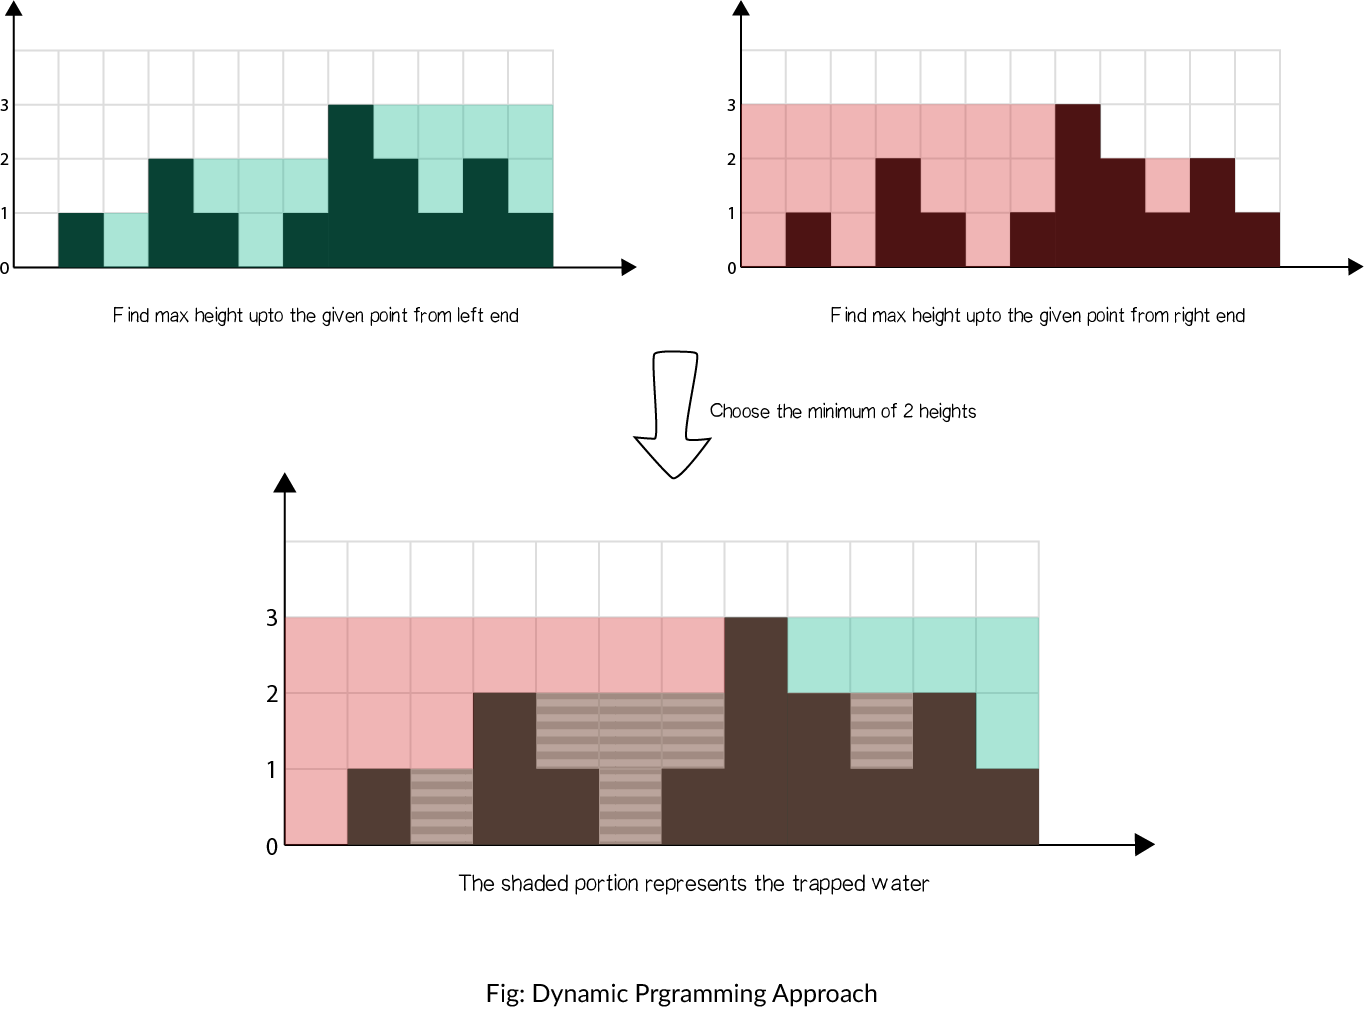

In [ ]:
class Solution:
    def trap(self, height: List[int]) -> int:
        res = 0
        n = len(height)
        l, r = [0]*n, [0]*n
        lmax, rmax = 0, 0
        if n == 0: return 0
        for i in range(n):
            lmax = max(lmax, height[i])
            l[i] = lmax
        for j in range(n-1,-1,-1):
            rmax = max(rmax, height[j])
            r[j] = rmax
        for k in range(n):
            res += min(l[k], r[k]) - height[k]
        return res

##### 2.单调栈

In [ ]:
class Solution:
    def trap(self, height: List[int]) -> int:
        ans = 0
        stack = list()
        n = len(height)
        
        for i, h in enumerate(height):
            while stack and h > height[stack[-1]]:
                top = stack.pop()
                if not stack:
                    break
                left = stack[-1]
                currWidth = i - left - 1
                currHeight = min(height[left], height[i]) - height[top]
                ans += currWidth * currHeight
            stack.append(i)
        
        return ans

##### 3.双指针

In [ ]:
class Solution:
    def trap(self, height: List[int]) -> int:
        ans = 0
        left, right = 0, len(height) - 1
        leftMax = rightMax = 0

        while left < right:
            leftMax = max(leftMax, height[left])
            rightMax = max(rightMax, height[right])
            if height[left] < height[right]:
                ans += leftMax - height[left]
                left += 1
            else:
                ans += rightMax - height[right]
                right -= 1
        
        return ans

### 46. 全排列

给定一个不含重复数字的数组 nums ，返回其 所有可能的全排列 。你可以 按任意顺序 返回答案。

##### 1.回溯

In [ ]:
class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        n = len(nums)
        if n == 0:
            return []
        res = []
        used = [False for _ in range(n)]

        def dfs(depth, path):
            if depth == n:
                res.append(path[:])
                return
            for i in range(n):
                if not used[i]:
                    used[i] = True
                    path.append(nums[i])
                    dfs(depth + 1, path)
                    used[i] = False
                    path.pop()

        dfs(0, [])
        return res

### 53. 最大子序和

给定一个整数数组 nums ，找到一个具有最大和的连续子数组（子数组最少包含一个元素），返回其最大和。

##### 1.动态规划

In [ ]:
class Solution:
    def maxSubArray(self, nums: List[int]) -> int:
        for i in range(1, len(nums)):
            nums[i] += max(nums[i - 1], 0)
        return max(nums)

In [ ]:
class Solution:
    def maxSubArray(self, nums: List[int]) -> int:
        temp=nums[0]
        max_=temp
        for i in range(1,len(nums)):
            if temp>0:               
                temp+=nums[i]
                max_=max(max_,temp)

            else:
                temp=nums[i]
                max_=max(max_,temp)
        return max_

### 54. 螺旋矩阵

给你一个 m 行 n 列的矩阵 matrix ，请按照 顺时针螺旋顺序 ，返回矩阵中的所有元素。

##### 1.模拟

In [ ]:
class Solution:
    def spiralOrder(self, matrix:[[int]]) -> [int]:
        if not matrix: return []
        l, r, t, b, res = 0, len(matrix[0]) - 1, 0, len(matrix) - 1, []
        while True:
            for i in range(l, r + 1): res.append(matrix[t][i]) # left to right
            t += 1
            if t > b: break
            for i in range(t, b + 1): res.append(matrix[i][r]) # top to bottom
            r -= 1
            if l > r: break
            for i in range(r, l - 1, -1): res.append(matrix[b][i]) # right to left
            b -= 1
            if t > b: break
            for i in range(b, t - 1, -1): res.append(matrix[i][l]) # bottom to top
            l += 1
            if l > r: break
        return res

### 66.加一

给定一个由 整数 组成的 非空 数组所表示的非负整数，在该数的基础上加一。

最高位数字存放在数组的首位， 数组中每个元素只存储单个数字。

你可以假设除了整数 0 之外，这个整数不会以零开头。

##### 1.模拟

In [ ]:
def plusOne(digits: list) -> list:
        digits[-1] += 1  # 首先把最后一位加一
        for i in range(len(digits)-2,-1,-1):  # 从低位到高位遍历
            if digits[i+1] >= 10:  # 如果低位>=10，那前一位的高位可以加一
                digits[i+1] = digits[i+1] % 10
                digits[i] += 1
            else:  # 如果我们的在某一位的数字没有产生进位的话，那么之后的高位再也不可能进位了，直接跳出
                break


        if digits[0] >= 10:  # 对最高位稍做处理，如解题思路中的[9,9,9]
            digits = [1] + digits
            digits[1] %= digits[1]

        return digits

### 70. 爬楼梯

假设你正在爬楼梯。需要 n 阶你才能到达楼顶。

每次你可以爬 1 或 2 个台阶。你有多少种不同的方法可以爬到楼顶呢？

注意：给定 n 是一个正整数。

##### 1.动态规划

In [ ]:
def numWays(n):
    a, b = 1, 1
    for _ in range(n):
        a, b = b, a+b
    return a

### 73. 矩阵置零

给定一个 m x n 的矩阵，如果一个元素为 0 ，则将其所在行和列的所有元素都设为 0 。请使用 原地 算法。

##### 1.哈希表

In [ ]:
class Solution:
    def setZeroes(self, matrix: List[List[int]]) -> None:
        m = len(matrix)
        n = len(matrix[0])
        box1 = [[1]*n]*m
        box2 = [[1]*m]*n
        for i in range(m):
            for j in range(n):
                c = matrix[i][j]
                if c == 0:
                    box1[i][j] = 0
                    box2[j][i] = 0
        for i in range(m):
            for j in range(n):
                if box1[i][j] == 0 or box2[j][i] == 0:
                    matrix[i][j] = 0

### 76.最小覆盖子串

给你一个字符串 s 、一个字符串 t 。返回 s 中涵盖 t 所有字符的最小子串。如果 s 中不存在涵盖 t 所有字符的子串，则返回空字符串 "" 。

注意：
对于 t 中重复字符，我们寻找的子字符串中该字符数量必须不少于 t 中该字符数量。
如果 s 中存在这样的子串，我们保证它是唯一的答案。

##### 1.滑动窗口法

In [ ]:
def minWindow(s: 'str', t: 'str') -> 'str':
    from collections import defaultdict
    lookup = defaultdict(int)
    for c in t:
        lookup[c] += 1
    start = 0
    end = 0
    min_len = float("inf")
    counter = len(t)
    res = ""
    while end < len(s):
        if lookup[s[end]] > 0:
            counter -= 1
        lookup[s[end]] -= 1
        end += 1
        while counter == 0:
            if min_len > end - start:
                min_len = end - start
                res = s[start:end]
            if lookup[s[start]] == 0:
                counter += 1
            lookup[s[start]] += 1
            start += 1
    return res

### 77. 组合

给定两个整数 n 和 k，返回范围 [1, n] 中所有可能的 k 个数的组合。

你可以按 任何顺序 返回答案。

##### 1.回溯+剪枝

In [ ]:
class Solution:
    def combine(self, n: int, k: int) -> List[List[int]]:
        ans = []
        def dfs(depth, path, start):
            if depth == k:
                ans.append(path)
                return

            for i in range(start, n+1):
                if k-depth-1 > n-i:
                    break
                dfs(depth+1, path+[i], i+1)
        dfs(0, [], 1)
        return ans

### 79. 单词搜索

给定一个 m x n 二维字符网格 board 和一个字符串单词 word 。如果 word 存在于网格中，返回 true ；否则，返回 false 。

单词必须按照字母顺序，通过相邻的单元格内的字母构成，其中“相邻”单元格是那些水平相邻或垂直相邻的单元格。同一个单元格内的字母不允许被重复使用。

##### 1.深度优先搜索+回溯

In [ ]:
def exist(board, word):
    m = len(board)
    n = len(board[0])
    def dfs(i,j,k):
        if not 0<=i<m or not 0<=j<n or board[i][j]!=word[k]:
            return False
        if k == len(word) -1:
            return True
        res = dfs(i+1, j, k+1) or dfs(i-1,j,k+1) or dfs(i,j+1,k+1) or dfs(i,j-1,k+1)
        board[i][j] = word[k]
        return res
    
    for i in range(m):
        for j in range(n):
            if dfs(i,j,0):
                return True
    return False

### 83. 删除排序链表中的重复元素

存在一个按升序排列的链表，给你这个链表的头节点 head ，请你删除所有重复的元素，使每个元素 只出现一次 。

返回同样按升序排列的结果链表。

##### 1.一次遍历

In [ ]:
class Solution:
    def deleteDuplicates(self, head: ListNode) -> ListNode:
        dummy = ListNode(None)
        dummy.next = head
        temp = dummy
        while temp.next:
            if temp.val == temp.next.val:
                temp.next = temp.next.next
            else:
                temp = temp.next
        return dummy.next

### 98. 验证二叉搜索树

给你一个二叉树的根节点 root ，判断其是否是一个有效的二叉搜索树。

有效 二叉搜索树定义如下：

节点的左子树只包含 小于 当前节点的数。
节点的右子树只包含 大于 当前节点的数。
所有左子树和右子树自身必须也是二叉搜索树。

##### 1.递归

In [ ]:
class Solution:
    def isValidBST(self, root: TreeNode) -> bool:
        def helper(node, lower = float('-inf'), upper = float('inf')) -> bool:
            if not node:
                return True
            
            val = node.val
            if val <= lower or val >= upper:
                return False

            if not helper(node.right, val, upper):
                return False
            if not helper(node.left, lower, val):
                return False
            return True

        return helper(root)

##### 2.中序遍历

In [ ]:
class Solution:
    def isValidBST(self, root: TreeNode) -> bool:
        stack, inorder = [], float('-inf')
        
        while stack or root:
            while root:
                stack.append(root)
                root = root.left
            root = stack.pop()
            # 如果中序遍历得到的节点的值小于等于前一个 inorder，说明不是二叉搜索树
            if root.val <= inorder:
                return False
            inorder = root.val
            root = root.right

        return True

### 100. 相同的树

给你两棵二叉树的根节点 p 和 q ，编写一个函数来检验这两棵树是否相同。

如果两个树在结构上相同，并且节点具有相同的值，则认为它们是相同的。

##### 1.深度优先搜索

In [ ]:
class Solution:
    def isSameTree(self, p: TreeNode, q: TreeNode) -> bool:
        if not p and not q:
            return True
        elif not p or not q:
            return False
        elif p.val != q.val:
            return False
        else:
            return self.isSameTree(p.left, q.left) and self.isSameTree(p.right, q.right)

##### 2.广度优先搜索

In [ ]:
class Solution:
    def isSameTree(self, p: TreeNode, q: TreeNode) -> bool:
        if not p and not q:
            return True
        if not p or not q:
            return False
        
        queue1 = collections.deque([p])
        queue2 = collections.deque([q])

        while queue1 and queue2:
            node1 = queue1.popleft()
            node2 = queue2.popleft()
            if node1.val != node2.val:
                return False
            left1, right1 = node1.left, node1.right
            left2, right2 = node2.left, node2.right
            if (not left1) ^ (not left2):
                return False
            if (not right1) ^ (not right2):
                return False
            if left1:
                queue1.append(left1)
            if right1:
                queue1.append(right1)
            if left2:
                queue2.append(left2)
            if right2:
                queue2.append(right2)

        return not queue1 and not queue2

### 101. 对称二叉树

给定一个二叉树，检查它是否是镜像对称的。

##### 1.递归

In [ ]:
class Solution:
    def isSymmetric(self, root: TreeNode) -> bool:
        def recur(L, R):
            if not L and not R: return True
            if not L or not R or L.val != R.val: return False
            return recur(L.left, R.right) and recur(L.right, R.left)

        return recur(root.left, root.right) if root else True

### 102. 二叉树的层序遍历

给你一个二叉树，请你返回其按 层序遍历 得到的节点值。 （即逐层地，从左到右访问所有节点）。

##### 1.层序遍历(广度优先搜索+队列)

In [ ]:
class Solution:
    def levelOrder(self, root: TreeNode) -> List[List[int]]:
        if not root: return []
        res, queue = [], collections.deque()
        queue.append(root)
        while queue:
            tmp = []
            for _ in range(len(queue)):
                node = queue.popleft()
                tmp.append(node.val)
                if node.left: 
                    queue.append(node.left)
                if node.right: 
                    queue.append(node.right)
            res.append(tmp)
        return res

### 104. 二叉树的最大深度

给定一个二叉树，找出其最大深度。

二叉树的深度为根节点到最远叶子节点的最长路径上的节点数。

说明: 叶子节点是指没有子节点的节点。

##### 1.后序遍历(深度优先搜索+递归/栈)

In [ ]:
class Solution:
    def maxDepth(self, root: TreeNode) -> int:
        if not root: return 0
        return max(self.maxDepth(root.left), self.maxDepth(root.right)) + 1

### 105. 从前序与中序遍历序列构造二叉树

给定一棵树的前序遍历 preorder 与中序遍历  inorder。请构造二叉树并返回其根节点。

##### 1.分治

In [ ]:
class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> TreeNode:
        def recur(root, left, right):
            if left > right: return                               # 递归终止
            node = TreeNode(preorder[root])                       # 建立根节点
            i = dic[preorder[root]]                               # 划分根节点、左子树、右子树
            node.left = recur(root + 1, left, i - 1)              # 开启左子树递归
            node.right = recur(i - left + root + 1, i + 1, right) # 开启右子树递归
            return node                                           # 回溯返回根节点

        dic, preorder = {}, preorder
        for i in range(len(inorder)):
            dic[inorder[i]] = i
        return recur(0, 0, len(inorder) - 1)

### 110. 平衡二叉树

给定一个二叉树，判断它是否是高度平衡的二叉树。

##### 1.后序遍历+剪枝

In [ ]:
class Solution:
    def isBalanced(self, root: TreeNode) -> bool:
        def recur(root):
            if not root: return 0
            left = recur(root.left)
            if left == -1: return -1
            right = recur(root.right)
            if right == -1: return -1
            return max(left, right) + 1 if abs(left - right) <= 1 else -1

        return recur(root) != -1

### 

##### 1.广度优先搜索

In [ ]:
class Solution:
    def hasPathSum(self, root: TreeNode, sum: int) -> bool:
        if not root:
            return False
        que_node = collections.deque([root])
        que_val = collections.deque([root.val])
        while que_node:
            now = que_node.popleft()
            temp = que_val.popleft()
            if not now.left and not now.right:
                if temp == sum:
                    return True
                continue
            if now.left:
                que_node.append(now.left)
                que_val.append(now.left.val + temp)
            if now.right:
                que_node.append(now.right)
                que_val.append(now.right.val + temp)
        return False

##### 2.递归

In [ ]:
class Solution:
    def hasPathSum(self, root: TreeNode, sum: int) -> bool:
        if not root:
            return False
        if not root.left and not root.right:
            return sum == root.val
        return self.hasPathSum(root.left, sum - root.val) or self.hasPathSum(root.right, sum - root.val)

##### 3.栈

In [ ]:
class Solution(object):
    def hasPathSum(self, root, sum):
        if not root:
            return False
        stack = []
        stack.append((root, root.val))
        while stack:
            node, path = stack.pop()
            if not node.left and not node.right and path == sum:
                return True
            if node.left:
                stack.append((node.left, path + node.left.val))
            if node.right:
                stack.append((node.right, path + node.right.val))
        return False

### 113. 路径总和 II

给你二叉树的根节点 root 和一个整数目标和 targetSum ，找出所有 从根节点到叶子节点 路径总和等于给定目标和的路径。

叶子节点 是指没有子节点的节点。

##### 1.回溯

In [ ]:
class Solution:
    def pathSum(self, root: TreeNode, target: int) -> List[List[int]]:
        res, path = [], []
        def recur(root, tar):
            if not root: return
            path.append(root.val)
            tar -= root.val
            if tar == 0 and not root.left and not root.right:
                res.append(list(path))
            recur(root.left, tar)
            recur(root.right, tar)
            path.pop()

        recur(root, target)
        return res

### 116. 填充每个节点的下一个右侧节点指针

给定一个 完美二叉树 ，其所有叶子节点都在同一层，每个父节点都有两个子节点。二叉树定义如下：

struct Node {
  int val;
  Node *left;
  Node *right;
  Node *next;
}
填充它的每个 next 指针，让这个指针指向其下一个右侧节点。如果找不到下一个右侧节点，则将 next 指针设置为 NULL。

初始状态下，所有 next 指针都被设置为 NULL。

##### 1.层序遍历

In [ ]:
import collections 

class Solution:
    def connect(self, root: 'Node') -> 'Node':
        if not root:
            return root
        Q = collections.deque([root])
        while Q:
            size = len(Q)
            for i in range(size):
                node = Q.popleft()
                if i < size - 1:
                    node.next = Q[0]
                if node.left:
                    Q.append(node.left)
                if node.right:
                    Q.append(node.right)
        return root

##### 2.讨论next指针

In [ ]:
class Solution:
    def connect(self, root: 'Node') -> 'Node':
        if not root:
            return root
        leftmost = root
        while leftmost.left:
            head = leftmost
            while head:
                head.left.next = head.right
                if head.next:
                    head.right.next = head.next.left
                head = head.next
            leftmost = leftmost.left
        return root 

### 118. 杨辉三角

给定一个非负整数 numRows，生成「杨辉三角」的前 numRows 行。

##### 1.动态规划

In [ ]:
class Solution:
    def generate(self, numRows: int) -> List[List[int]]:
        dp = [[1]*i for i in range(1,numRows+1)]
        if numRows > 1:
            for i in range(2, numRows):
                for j in range(1, i):
                    dp[i][j] = dp[i-1][j-1] + dp[i-1][j]
        return dp

### 119. 杨辉三角 II

给定一个非负索引 rowIndex，返回「杨辉三角」的第 rowIndex 行。

##### 1.动态规划

In [ ]:
class Solution:
    def getRow(self, rowIndex: int) -> List[int]:
        res = []
        n = rowIndex
        dp = [[0] * i for i in range(1,n+2)]
        for i in range(n+1):
            dp[i][0] = 1
            dp[i][i] = 1
            for j in range(1, i):
                dp[i][j] = dp[i-1][j-1] + dp[i-1][j]
        return dp[n]

In [ ]:
class Solution:
    def getRow(self, rowIndex: int) -> List[int]:
        res = [1]
        for i in range(rowIndex):
            res.append(1)
            for j in range(1, len(res) - 1):
                if j == 1:
                    temp = res[j]
                    res[j] = res[j] + 1
                else:
                    tempHere = res[j]
                    res[j] = res[j] + temp
                    temp = tempHere
        return res

### 120. 三角形最小路径和

给定一个三角形 triangle ，找出自顶向下的最小路径和。

每一步只能移动到下一行中相邻的结点上。相邻的结点 在这里指的是 下标 与 上一层结点下标 相同或者等于 上一层结点下标 + 1 的两个结点。也就是说，如果正位于当前行的下标 i ，那么下一步可以移动到下一行的下标 i 或 i + 1 。

##### 1.动态规划

In [ ]:
class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        n = len(triangle)
        f = [[0] * n for _ in range(n)]
        f[0][0] = triangle[0][0]

        for i in range(1, n):
            f[i][0] = f[i - 1][0] + triangle[i][0]
            for j in range(1, i):
                f[i][j] = min(f[i - 1][j - 1], f[i - 1][j]) + triangle[i][j]
            f[i][i] = f[i - 1][i - 1] + triangle[i][i]
        
        return min(f[n - 1])

In [ ]:
class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        n = len(triangle)
        f = [0] * n
        f[0] = triangle[0][0]

        for i in range(1, n):
            f[i] = f[i - 1] + triangle[i][i]
            for j in range(i - 1, 0, -1):
                f[j] = min(f[j - 1], f[j]) + triangle[i][j]
            f[0] += triangle[i][0]
        
        return min(f)

### 121. 买卖股票的最佳时机

给定一个数组 prices ，它的第 i 个元素 prices[i] 表示一支给定股票第 i 天的价格。

你只能选择 某一天 买入这只股票，并选择在 未来的某一个不同的日子 卖出该股票。设计一个算法来计算你所能获取的最大利润。

返回你可以从这笔交易中获取的最大利润。如果你不能获取任何利润，返回 0 。

##### 1.动态规划

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        n = len(prices)
        if n == 0: return 0 # 边界条件
        dp = [0] * n
        minprice = prices[0] 

        for i in range(1, n):
            minprice = min(minprice, prices[i])
            dp[i] = max(dp[i - 1], prices[i] - minprice)

        return dp[-1]

##### 2.一次遍历

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        minprice = float('inf')
        maxprofit = 0
        for price in prices:
            minprice = min(minprice, price)
            maxprofit = max(maxprofit, price - minprice)
        return maxprofit

### 122. 买卖股票的最佳时机 II

给定一个数组 prices ，其中 prices[i] 是一支给定股票第 i 天的价格。

设计一个算法来计算你所能获取的最大利润。你可以尽可能地完成更多的交易（多次买卖一支股票）。

注意：你不能同时参与多笔交易（你必须在再次购买前出售掉之前的股票）。

##### 1.一次遍历

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        profit = 0
        for i in range(1, len(prices)):
            tmp = prices[i] - prices[i - 1]
            if tmp > 0: profit += tmp
        return profit

### 136. 只出现一次的数字

给定一个非空整数数组，除了某个元素只出现一次以外，其余每个元素均出现两次。找出那个只出现了一次的元素。

##### 1.位运算(异或运算)

In [ ]:
def singleNumber(nums) -> int:
    return reduce(lambda x, y: x ^ y, nums)

### 137. 只出现一次的数字 II

给你一个整数数组 nums ，除某个元素仅出现 一次 外，其余每个元素都恰出现 三次 。请你找出并返回那个只出现了一次的元素。

##### 1.异或运算

In [ ]:
def singleNumber(nums) -> int:
    a = b = 0
    for num in nums:
        b = ~a & (b ^ num)
        a = ~b & (a ^ num)
    return b

### 141. 环形链表

给你一个链表的头节点 head ，判断链表中是否有环。

如果链表中有某个节点，可以通过连续跟踪 next 指针再次到达，则链表中存在环。 为了表示给定链表中的环，评测系统内部使用整数 pos 来表示链表尾连接到链表中的位置（索引从 0 开始）。如果 pos 是 -1，则在该链表中没有环。注意：pos 不作为参数进行传递，仅仅是为了标识链表的实际情况。

如果链表中存在环，则返回 true 。 否则，返回 false 。

##### 1.哈希表

In [ ]:
class Solution:
    def hasCycle(self, head: ListNode) -> bool:
        seen = set()
        while head:
            if head in seen:
                return True
            seen.add(head)
            head = head.next
        return False

##### 2.快慢指针

In [ ]:
class Solution:
    def hasCycle(self, head: ListNode) -> bool:
        if not head or not head.next:
            return False
        
        slow = head
        fast = head.next

        while slow != fast:
            if not fast or not fast.next:
                return False
            slow = slow.next
            fast = fast.next.next
        
        return True

### 153. 寻找旋转排序数组中的最小值

已知一个长度为 n 的数组，预先按照升序排列，经由 1 到 n 次 旋转 后，得到输入数组。例如，原数组 nums = [0,1,2,4,5,6,7] 在变化后可能得到：
若旋转 4 次，则可以得到 [4,5,6,7,0,1,2]
若旋转 7 次，则可以得到 [0,1,2,4,5,6,7]
注意，数组 [a[0], a[1], a[2], ..., a[n-1]] 旋转一次 的结果为数组 [a[n-1], a[0], a[1], a[2], ..., a[n-2]] 。

给你一个元素值 互不相同 的数组 nums ，它原来是一个升序排列的数组，并按上述情形进行了多次旋转。请你找出并返回数组中的 最小元素 。

##### 1.二分查找

In [ ]:
def findMin(nums) -> int:    
    low, high = 0, len(nums) - 1
    while low < high:
        pivot = low + (high - low) // 2
        if nums[pivot] < nums[high]:
            high = pivot 
        else:
            low = pivot + 1
    return nums[low]

### 154. 寻找旋转排序数组中的最小值 II

已知一个长度为 n 的数组，预先按照升序排列，经由 1 到 n 次 旋转 后，得到输入数组。例如，原数组 nums = [0,1,4,4,5,6,7] 在变化后可能得到：
若旋转 4 次，则可以得到 [4,5,6,7,0,1,4]
若旋转 7 次，则可以得到 [0,1,4,4,5,6,7]
注意，数组 [a[0], a[1], a[2], ..., a[n-1]] 旋转一次 的结果为数组 [a[n-1], a[0], a[1], a[2], ..., a[n-2]] 。

给你一个可能存在 重复 元素值的数组 nums ，它原来是一个升序排列的数组，并按上述情形进行了多次旋转。请你找出并返回数组中的 最小元素 


##### 1.二分查找

In [ ]:
def findMin(nums) -> int:    
    low, high = 0, len(nums) - 1
    while low < high:
        pivot = low + (high - low) // 2
        if nums[pivot] < nums[high]:
            high = pivot 
        elif nums[pivot] > nums[high]:
            low = pivot + 1
        else:
            high -= 1
    return nums[low]

### 155. 最小栈

设计一个支持 push ，pop ，top 操作，并能在常数时间内检索到最小元素的栈。

push(x) —— 将元素 x 推入栈中。    
pop() —— 删除栈顶的元素。    
top() —— 获取栈顶元素。    
getMin() —— 检索栈中的最小元素。

##### 1.辅助栈

In [ ]:
class MinStack:
    def __init__(self):
        self.A, self.B = [], []

    def push(self, x: int) -> None:
        self.A.append(x)
        if not self.B or self.B[-1] >= x:
            self.B.append(x)

    def pop(self) -> None:
        if self.A.pop() == self.B[-1]:
            self.B.pop()

    def top(self) -> int:
        return self.A[-1]

    def min(self) -> int:
        return self.B[-1]

### 159. 至多包含两个不同字符的最长子串

##### 1.滑动窗口法

In [ ]:
def lengthOfLongestSubstringTwoDistinct(s: str) -> int:
    from collections import defaultdict
    lookup = defaultdict(int)
    start = 0
    end = 0##### 滑动窗口法
    max_len = 0
    counter = 0
    while end < len(s):
        if lookup[s[end]] == 0:
            counter += 1
        lookup[s[end]] += 1
        end +=1
        while counter > 2:
            if lookup[s[start]] == 1:
                counter -= 1
            lookup[s[start]] -= 1
            start += 1
        max_len = max(max_len, end - start)
    return max_len

### 167. 两数之和 II - 输入有序数组

给定一个已按照 非递减顺序排列  的整数数组 numbers ，请你从数组中找出两个数满足相加之和等于目标数 target 。

函数应该以长度为 2 的整数数组的形式返回这两个数的下标值。numbers 的下标 从 1 开始计数 ，所以答案数组应当满足 1 <= answer[0] < answer[1] <= numbers.length 。

你可以假设每个输入 只对应唯一的答案 ，而且你 不可以 重复使用相同的元素。

##### 1.二分查找

In [ ]:
class Solution:
    def twoSum(self, numbers: List[int], target: int) -> List[int]:
        n = len(numbers)
        for i in range(n):
            low, high = i + 1, n - 1
            while low <= high:
                mid = (low + high) // 2
                if numbers[mid] == target - numbers[i]:
                    return [i + 1, mid + 1]
                elif numbers[mid] > target - numbers[i]:
                    high = mid - 1
                else:
                    low = mid + 1
        
        return [-1, -1]

##### 2.双指针

In [ ]:
class Solution:
    def twoSum(self, numbers: List[int], target: int) -> List[int]:
        low, high = 0, len(numbers) - 1
        while low < high:
            total = numbers[low] + numbers[high]
            if total == target:
                return [low + 1, high + 1]
            elif total < target:
                low += 1
            else:
                high -= 1

        return [-1, -1]

### 169. 多数元素

给定一个大小为 n 的数组，找到其中的多数元素。多数元素是指在数组中出现次数 大于 ⌊ n/2 ⌋ 的元素。

你可以假设数组是非空的，并且给定的数组总是存在多数元素。

##### 1.哈希表统计

In [ ]:
class Solution:
    def majorityElement(self, nums: List[int]) -> int:

        if not nums:  # 数组为空
            return 0

        hashset = {}
        for num in nums:
            hashset[num] = hashset[num] + 1 if hashset.get(num) else 1

        for key, value in hashset.items():
            if value > len(nums) / 2:
                return key
        return 0  # 不存在众数

### 190. 颠倒二进制位

颠倒给定的 32 位无符号整数的二进制位。

##### 1.循环

In [ ]:
class Solution:
    def reverseBits(self, n):
        res = 0
        for i in range(32):
            res = (res << 1) | (n & 1)
            n >>= 1
        return res

##### 2.分治

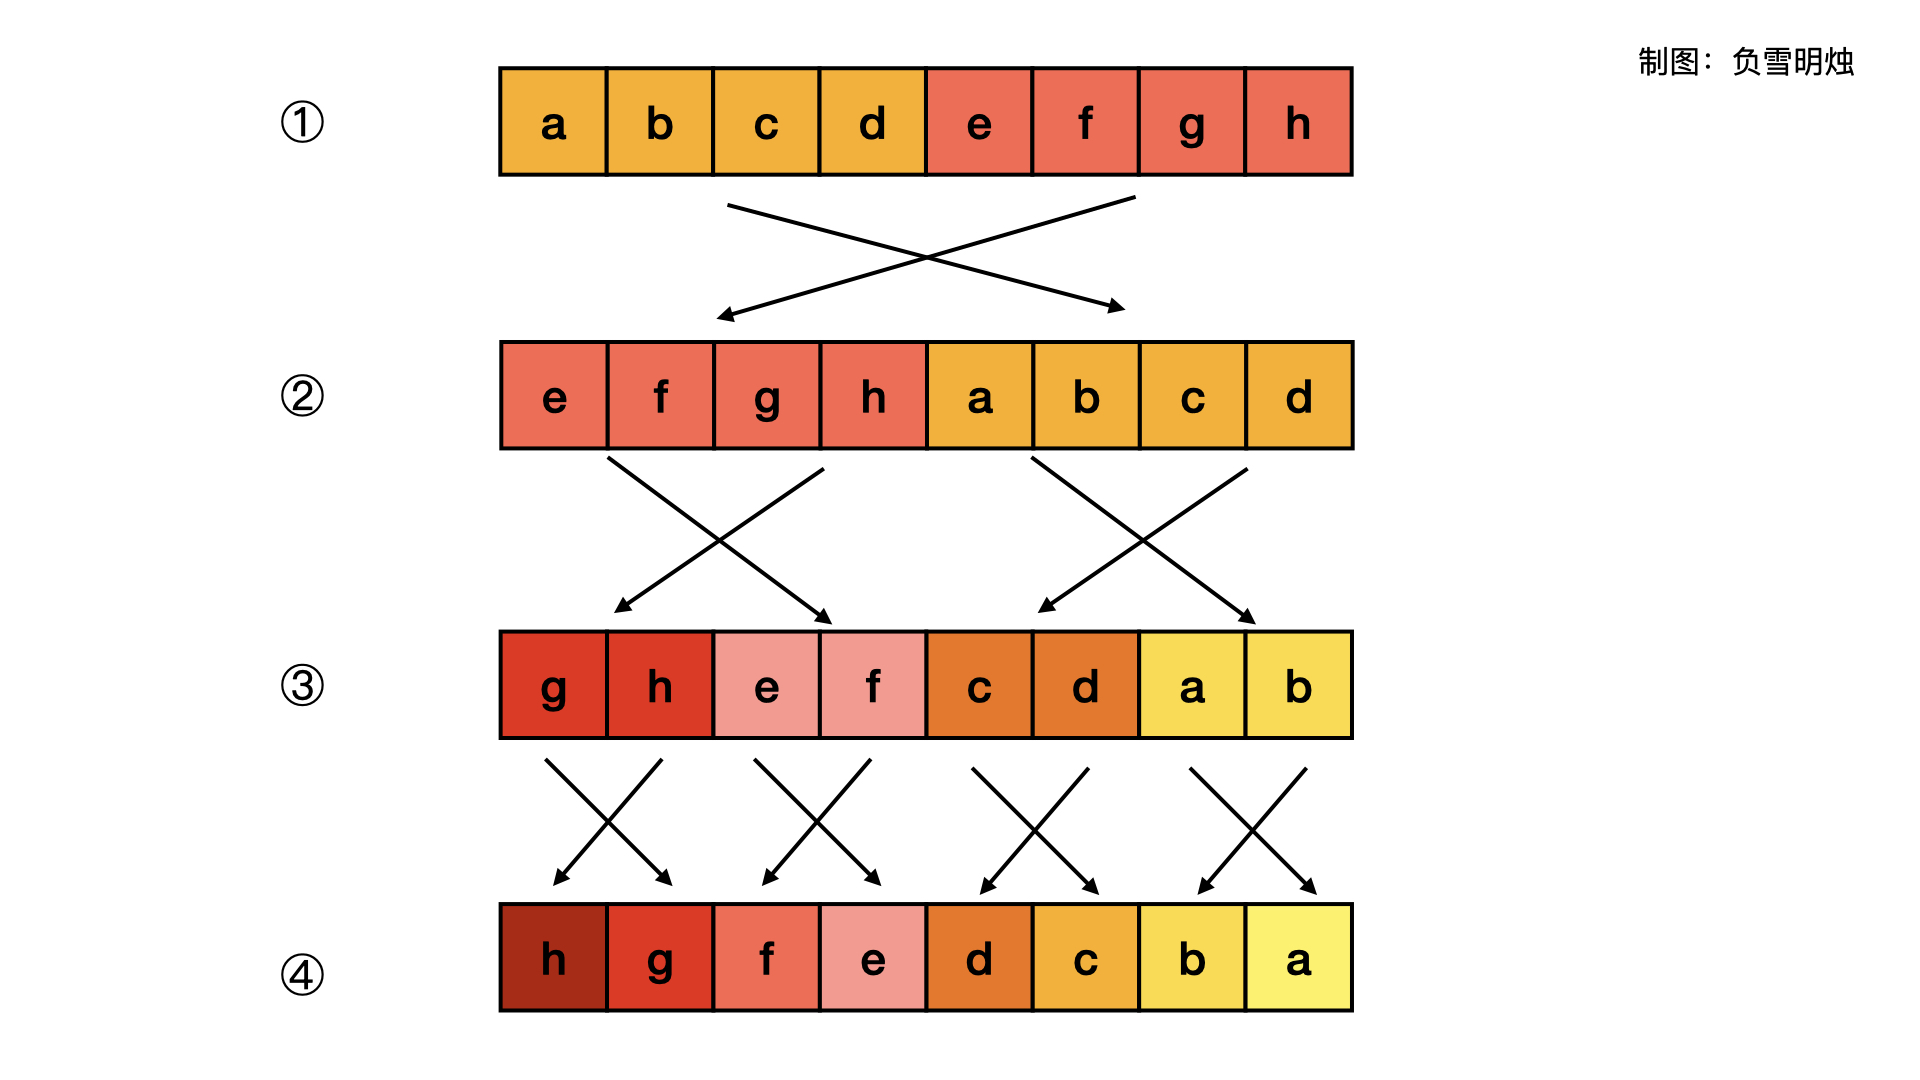

In [ ]:
class Solution:
    def reverseBits(self, n):
        n = (n >> 16) | (n << 16);
        n = ((n & 0xff00ff00) >> 8) | ((n & 0x00ff00ff) << 8);
        n = ((n & 0xf0f0f0f0) >> 4) | ((n & 0x0f0f0f0f) << 4);
        n = ((n & 0xcccccccc) >> 2) | ((n & 0x33333333) << 2);
        n = ((n & 0xaaaaaaaa) >> 1) | ((n & 0x55555555) << 1);
        return n

### 191. 位1的个数

编写一个函数，输入是一个无符号整数（以二进制串的形式），返回其二进制表达式中数字位数为 '1' 的个数（也被称为汉明重量）。

##### 1.位运算

In [ ]:
class Solution:
    def hammingWeight(self, n: int) -> int:
        res = 0
        while n:
            res += n & 1#判断末位是否为1
            n >>= 1
        return res

##### 2.与运算

In [ ]:
class Solution:
    def hammingWeight(self, n: int) -> int:
        res = 0
        while n:
            res += 1
            n &= n - 1
        return res

##### 3.库函数

In [ ]:
class Solution(object):
    def hammingWeight(self, n):
        return bin(n).count("1")

### 198. 打家劫舍

你是一个专业的小偷，计划偷窃沿街的房屋。每间房内都藏有一定的现金，影响你偷窃的唯一制约因素就是相邻的房屋装有相互连通的防盗系统，如果两间相邻的房屋在同一晚上被小偷闯入，系统会自动报警。

给定一个代表每个房屋存放金额的非负整数数组，计算你 不触动警报装置的情况下 ，一夜之内能够偷窃到的最高金额。

##### 1.动态规划

In [ ]:
class Solution:
    def rob(self, nums: List[int]) -> int:
        if not nums:
            return 0

        size = len(nums)
        if size == 1:
            return nums[0]
        
        dp = [0] * size
        dp[0] = nums[0]
        dp[1] = max(nums[0], nums[1])
        for i in range(2, size):
            dp[i] = max(dp[i - 2] + nums[i], dp[i - 1])
        
        return dp[size - 1]

### 203. 移除链表元素

给你一个链表的头节点 head 和一个整数 val ，请你删除链表中所有满足 Node.val == val 的节点，并返回 新的头节点 。

##### 1.递归

In [ ]:
class Solution:
    def removeElements(self, head: ListNode, val: int) -> ListNode:
        if not head:
            return head
        head.next = self.removeElements(head.next, val)
        return head.next if head.val == val else head

##### 2.迭代

In [ ]:
class Solution:
    def removeElements(self, head: ListNode, val: int) -> ListNode:
        dummy = ListNode(None);
        dummy.next = head
        temp = dummy
        while temp.next:
            if temp.next.val == val:
                temp.next = temp.next.next
            else:
                temp = temp.next
        return dummy.next

### 206. 反转链表

给你单链表的头节点 head ，请你反转链表，并返回反转后的链表。

##### 1.迭代(双指针)

In [ ]:
class Solution:
    def reverseList(self, head: ListNode) -> ListNode:
        cur, pre = head, None
        while cur:
            tmp = cur.next # 暂存后继节点 cur.next
            cur.next = pre # 修改 next 引用指向
            pre = cur      # pre 暂存 cur
            cur = tmp      # cur 访问下一节点
        return pre

##### 2.递归

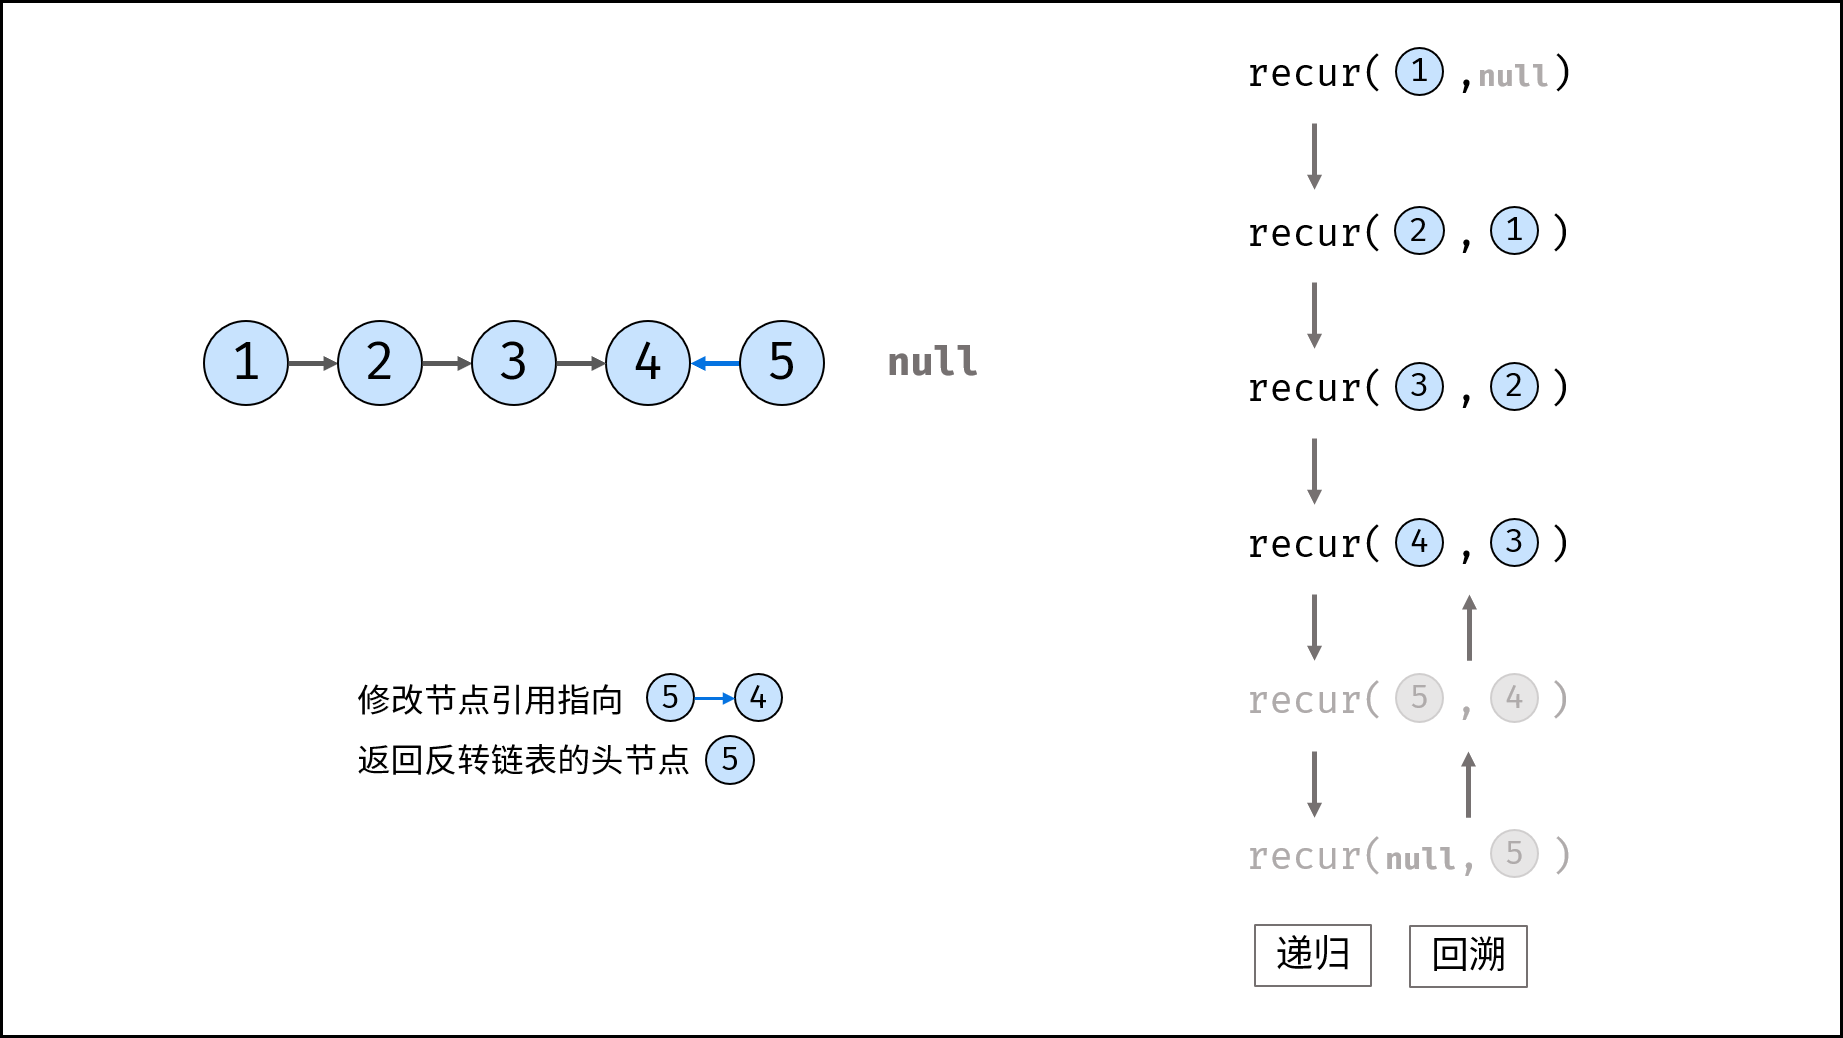

In [ ]:
class Solution:
    def reverseList(self, head: ListNode) -> ListNode:
        def recur(cur, pre):
            if not cur: return pre     # 终止条件
            res = recur(cur.next, cur) # 递归后继节点
            cur.next = pre             # 修改节点引用指向
            return res                 # 返回反转链表的头节点
        
        return recur(head, None)       # 调用递归并返回

### 226. 翻转二叉树

翻转一棵二叉树。

##### 1.递归

In [ ]:
#平行赋值
class Solution:
    def mirrorTree(self, root: TreeNode) -> TreeNode:
        if not root: return#return null
        root.left, root.right = \
        self.mirrorTree(root.right), self.mirrorTree(root.left)
        return root

### 231. 2 的幂

给你一个整数 n，请你判断该整数是否是 2 的幂次方。如果是，返回 true ；否则，返回 false 。

如果存在一个整数 x 使得 n == 2x ，则认为 n 是 2 的幂次方。

##### 1.位运算

In [ ]:
class Solution:
    def isPowerOfTwo(self, n: int) -> bool:
        return n > 0 and n & (n - 1) == 0

### 232. 用栈实现队列

请你仅使用两个栈实现先入先出队列。队列应当支持一般队列支持的所有操作（push、pop、peek、empty）：

实现 MyQueue 类：

void push(int x) 将元素 x 推到队列的末尾
int pop() 从队列的开头移除并返回元素
int peek() 返回队列开头的元素
boolean empty() 如果队列为空，返回 true ；否则，返回 false

##### 1.辅助栈

In [ ]:
class MyQueue:

    def __init__(self):
        self.stack  = []
        self.stack2 = []

    def push(self, x: int) -> None:
        self.stack.append(x)

    def pop(self) -> int:
        while len(self.stack) != 1:
            self.stack2.append(self.stack.pop())
        r = self.stack.pop()
        while self.stack2:
            self.stack.append(self.stack2.pop())
        return r

    def peek(self) -> int:
        return self.stack[0]

    def empty(self) -> bool:
        return len(self.stack) == 0

### 235. 二叉搜索树的最近公共祖先

给定一个二叉搜索树, 找到该树中两个指定节点的最近公共祖先。

百度百科中最近公共祖先的定义为：“对于有根树 T 的两个结点 p、q，最近公共祖先表示为一个结点 x，满足 x 是 p、q 的祖先且 x 的深度尽可能大（一个节点也可以是它自己的祖先）。”

##### 1.迭代

In [ ]:
class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        while root:
            if root.val < p.val and root.val < q.val: # p,q 都在 root 的右子树中
                root = root.right # 遍历至右子节点
            elif root.val > p.val and root.val > q.val: # p,q 都在 root 的左子树中
                root = root.left # 遍历至左子节点
            else: break
        return root

##### 2.递归

In [ ]:
class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        if root.val < p.val and root.val < q.val:
            return self.lowestCommonAncestor(root.right, p, q)
        if root.val > p.val and root.val > q.val:
            return self.lowestCommonAncestor(root.left, p, q)
        return root

### 236. 二叉树的最近公共祖先

给定一个二叉树, 找到该树中两个指定节点的最近公共祖先。

百度百科中最近公共祖先的定义为：“对于有根树 T 的两个节点 p、q，最近公共祖先表示为一个节点 x，满足 x 是 p、q 的祖先且 x 的深度尽可能大（一个节点也可以是它自己的祖先）。”

##### 1.递归

In [ ]:
class Solution:
    def lowestCommonAncestor(self, root: TreeNode, p: TreeNode, q: TreeNode) -> TreeNode:
        if not root or root == p or root == q: return root
        left = self.lowestCommonAncestor(root.left, p, q)
        right = self.lowestCommonAncestor(root.right, p, q)
        if not left: return right
        if not right: return left
        return root

### 239. 滑动窗口最大值

给你一个整数数组 nums，有一个大小为 k 的滑动窗口从数组的最左侧移动到数组的最右侧。你只可以看到在滑动窗口内的 k 个数字。滑动窗口每次只向右移动一位。

返回滑动窗口中的最大值。

##### 1.单调队列

In [ ]:
class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        deque = collections.deque()
        res, n = [], len(nums)
        for i, j in zip(range(1 - k, n + 1 - k), range(n)):
            # 删除 deque 中对应的 nums[i-1]
            if i > 0 and deque[0] == nums[i - 1]:
                deque.popleft()
            # 保持 deque 递减
            while deque and deque[-1] < nums[j]:
                deque.pop()
            deque.append(nums[j])
            # 记录窗口最大值
            if i >= 0:
                res.append(deque[0])
        return res

### 242. 有效的字母异位词

给定两个字符串 s 和 t ，编写一个函数来判断 t 是否是 s 的字母异位词。

注意：若 s 和 t 中每个字符出现的次数都相同，则称 s 和 t 互为字母异位词。

##### 1.哈希表

In [ ]:
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        countS = collections.Counter(s)
        countT = collections.Counter(t)
        if countS != countT:
            return False
        else:
            return True

### 264. 丑数 II

给你一个整数 n ，请你找出并返回第 n 个 丑数 。

丑数 就是只包含质因数 2、3 和/或 5 的正整数。

##### 1.动态规划

In [ ]:
class Solution:
    def nthUglyNumber(self, n: int) -> int:
        dp, a, b, c = [1] * n, 0, 0, 0
        for i in range(1, n):
            n2, n3, n5 = dp[a] * 2, dp[b] * 3, dp[c] * 5
            dp[i] = min(n2, n3, n5)
            if dp[i] == n2: a += 1
            if dp[i] == n3: b += 1
            if dp[i] == n5: c += 1
        return dp[-1]

### 279. 完全平方数

给定正整数 n，找到若干个完全平方数（比如 1, 4, 9, 16, ...）使得它们的和等于 n。你需要让组成和的完全平方数的个数最少。

给你一个整数 n ，返回和为 n 的完全平方数的 最少数量 。

完全平方数 是一个整数，其值等于另一个整数的平方；换句话说，其值等于一个整数自乘的积。例如，1、4、9 和 16 都是完全平方数，而 3 和 11 不是。

##### 1.动态规划

In [ ]:
class Solution:
    def numSquares(self, n: int) -> int:
        dp = [i for i in range(n+1)]
        for i in range(n+1):
            j = 1
            while j*j <= i:
                dp[i] = min(dp[i], dp[i - j*j]+1)             
                j += 1
        return dp[-1]

### 283. 移动零

给定一个数组 nums，编写一个函数将所有 0 移动到数组的末尾，同时保持非零元素的相对顺序。

##### 1.双指针

In [ ]:
class Solution:
    def moveZeroes(self, nums: List[int]) -> None:
        n = len(nums)
        f, s = 0, 0 #fast&slow
        while f < n:
            if nums[f] != 0:
                nums[s] = nums[f]
                s += 1
            f += 1
        while s < n:
            nums[s] = 0
            s += 1

### 297. 二叉树的序列化与反序列化

序列化是将一个数据结构或者对象转换为连续的比特位的操作，进而可以将转换后的数据存储在一个文件或者内存中，同时也可以通过网络传输到另一个计算机环境，采取相反方式重构得到原数据。

请设计一个算法来实现二叉树的序列化与反序列化。这里不限定你的序列 / 反序列化算法执行逻辑，你只需要保证一个二叉树可以被序列化为一个字符串并且将这个字符串反序列化为原始的树结构。

提示: 输入输出格式与 LeetCode 目前使用的方式一致，详情请参阅 LeetCode 序列化二叉树的格式。你并非必须采取这种方式，你也可以采用其他的方法解决这个问题。

##### 1.层序遍历

In [ ]:
class Codec:
    def serialize(self, root):
        if not root: return "[]"
        queue = collections.deque()
        queue.append(root)
        res = []
        while queue:
            node = queue.popleft()
            if node:
                res.append(str(node.val))
                queue.append(node.left)
                queue.append(node.right)
            else: res.append("null")
        return '[' + ','.join(res) + ']'

    def deserialize(self, data):
        if data == "[]": return
        vals, i = data[1:-1].split(','), 1
        root = TreeNode(int(vals[0]))
        queue = collections.deque()
        queue.append(root)
        while queue:
            node = queue.popleft()
            if vals[i] != "null":
                node.left = TreeNode(int(vals[i]))
                queue.append(node.left)
            i += 1
            if vals[i] != "null":
                node.right = TreeNode(int(vals[i]))
                queue.append(node.right)
            i += 1
        return root

### 322. 零钱兑换

给你一个整数数组 coins ，表示不同面额的硬币；以及一个整数 amount ，表示总金额。

计算并返回可以凑成总金额所需的 最少的硬币个数 。如果没有任何一种硬币组合能组成总金额，返回 -1 。

你可以认为每种硬币的数量是无限的。

##### 1.广度优先搜素

In [ ]:
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        @functools.lru_cache(amount)
        def dp(rem) -> int:
            if rem < 0: return -1
            if rem == 0: return 0
            mini = int(1e9)
            for coin in self.coins:
                res = dp(rem - coin)
                if res >= 0 and res < mini:
                    mini = res + 1
            return mini if mini < int(1e9) else -1

        self.coins = coins
        if amount < 1: return 0
        return dp(amount)

##### 2.动态规划

In [ ]:
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        dp = [float('inf')] * (amount + 1)
        dp[0] = 0
        
        for coin in coins:
            for x in range(coin, amount + 1):
                dp[x] = min(dp[x], dp[x - coin] + 1)
        return dp[amount] if dp[amount] != float('inf') else -1 

### 340. 至多包含 K 个不同字符的最长子串

##### 1.滑动窗口法

In [ ]:
def lengthOfLongestSubstringKDistinct(s: str, k: int) -> int:
    from collections import defaultdict
    lookup = defaultdict(int)
    start = 0
    end = 0
    max_len = 0
    counter = 0
    while end < len(s):
        if lookup[s[end]] == 0:
            counter += 1
        lookup[s[end]] += 1
        end += 1
        while counter > k:
            if lookup[s[start]] == 1:
                counter -= 1
            lookup[s[start]] -= 1
            start += 1
        max_len = max(max_len, end - start)
    return max_len

### 343. 整数拆分

给定一个正整数 n，将其拆分为至少两个正整数的和，并使这些整数的乘积最大化。 返回你可以获得的最大乘积。

##### 1.贪心算法

In [ ]:
def cuttingRope(n):
    small = {0:0, 1:1, 2:1, 3:2, 4:4, 5:6}
    if n in small:
        return small[n]
    else:
        i = n % 3
        j = n // 3
        print(j)
        dic = {1:4, 2:6, 0:3}
        print(dic[i])
        res = (3**(j-1))*dic[i]
        return res

### 344. 反转字符串

编写一个函数，其作用是将输入的字符串反转过来。输入字符串以字符数组 s 的形式给出。

不要给另外的数组分配额外的空间，你必须原地修改输入数组、使用 O(1) 的额外空间解决这一问题。

##### 1.双指针

In [ ]:
class Solution:
    def reverseString(self, s: List[str]) -> None:
        """
        Do not return anything, modify s in-place instead.
        """
        n = len(s)
        l, r = 0, n-1
        while l < r:
            s[l], s[r] = s[r], s[l]
            l += 1
            r -= 1
        return s

### 350. 两个数组的交集 II

给你两个整数数组 nums1 和 nums2 ，请你以数组形式返回两数组的交集。返回结果中每个元素出现的次数，应与元素在两个数组中都出现的次数一致（如果出现次数不一致，则考虑取较小值）。可以不考虑输出结果的顺序。

##### 1.哈希表

In [ ]:
class Solution:
    def intersect(self, nums1: List[int], nums2: List[int]) -> List[int]:
        dic = {}
        res = []
        for i in nums1:
            if i not in dic: dic[i] = 1
            else: dic[i] += 1
        for j in nums2:
            if j in dic and dic[j] > 0:
                res.append(j)
                dic[j] -= 1
        return res

In [ ]:
class Solution:
    def intersect(self, nums1: List[int], nums2: List[int]) -> List[int]:
        if len(nums1) > len(nums2):
            return self.intersect(nums2, nums1)
        
        m = collections.Counter()
        for num in nums1:
            m[num] += 1
        
        intersection = list()
        for num in nums2:
            if (count := m.get(num, 0)) > 0:
                intersection.append(num)
                m[num] -= 1
                if m[num] == 0:
                    m.pop(num)
        
        return intersection

##### 2.排序+双指针

In [ ]:
class Solution:
    def intersect(self, nums1: List[int], nums2: List[int]) -> List[int]:
        nums1.sort()
        nums2.sort()

        length1, length2 = len(nums1), len(nums2)
        intersection = list()
        index1 = index2 = 0
        while index1 < length1 and index2 < length2:
            if nums1[index1] < nums2[index2]:
                index1 += 1
            elif nums1[index1] > nums2[index2]:
                index2 += 1
            else:
                intersection.append(nums1[index1])
                index1 += 1
                index2 += 1
        
        return intersection

### 383. 赎金信

给你两个字符串：ransomNote 和 magazine ，判断 ransomNote 能不能由 magazine 里面的字符构成。

如果可以，返回 true ；否则返回 false 。

magazine 中的每个字符只能在 ransomNote 中使用一次。

##### 1.哈希表

In [ ]:
class Solution:
    def canConstruct(self, ransomNote: str, magazine: str) -> bool:
        countR = collections.Counter(ransomNote)
        countM = collections.Counter(magazine)
        for i in countR:
            if i not in countM: return False
            if countR[i] > countM[i]:
                return False
        return True

### 387. 字符串中的第一个唯一字符

给定一个字符串，找到它的第一个不重复的字符，并返回它的索引。如果不存在，则返回 -1。

##### 1.哈希表

In [ ]:
class Solution:
    def firstUniqChar(self, s: str) -> int:
        count = collections.Counter(s)
        for idx, val in enumerate(s):
            if count[val] == 1:
                return idx
        return -1

### 400. 第 N 位数字

在无限的整数序列 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...中找到第 n 位数字。

##### 1.迭代

In [ ]:
class Solution:
    def findNthDigit(self, n: int) -> int:
        digit, start, count = 1, 1, 9
        # 1.确定所求数位的所在数字的位数
        while n > count: 
            n -= count
            start *= 10
            digit += 1
            count = 9 * start * digit
        # 2.确定所求数位所在的数字
        num = start + (n - 1) // digit 
        # 3.确定所求数位在 num 的哪一数位
        return int(str(num)[(n - 1) % digit]) 

### 415. 字符串相加

给定两个字符串形式的非负整数 num1 和num2 ，计算它们的和并同样以字符串形式返回。

你不能使用任何內建的用于处理大整数的库（比如 BigInteger）， 也不能直接将输入的字符串转换为整数形式。

##### 1.模拟

In [3]:
def addStrings(num1, num2):
    #i,j两个指针指向num1和num2的末尾
    i = len(num1) - 1
    j = len(num2) - 1
    add = 0
    ans = ''
    #如果指针为负数,说明数位不对,于是补0
    while i >= 0 or j >= 0 or add != 0:
        x = i 
        if x >= 0:
            x = int(num1[i])
        else:
            x = 0
        
        y = j
        if y >= 0:
            y = int(num2[j])
        else:
            y = 0
        #使用add处理进位问题
        result = x + y + add
        res = str(result%10)
        ans += res
        add = result // 10;
        i -= 1
        j -= 1

    ans = ans[::-1]
    return ans

### 416. 分割等和子集

给你一个 只包含正整数 的 非空 数组 nums 。请你判断是否可以将这个数组分割成两个子集，使得两个子集的元素和相等。

##### 1.动态规划(0-1背包)

In [ ]:
class Solution:
    def canPartition(self, nums: List[int]) -> bool:
        # 获取nums长度和总和
        length = len(nums)
        amount = sum(nums)
        # 如果总和是奇数 则必不可能被平分
        if amount % 2 != 0:
            return False
        # 目标总和
        target = int(amount / 2)
        # 初始化dp数组
        dp = [False] * (target+1)
        dp[0] = True

        # 最外层循环相当于允许取越来越多的元素 允许取[0-i]
        for i in range(1,length):
            # 假如在循环过程中已经发现目标可达成 及时退出循环节省时间
            if dp[target] == True:
                return True
            # 自顶向下动态规划计算
            for j in range(target,nums[i]-1,-1):
                dp[j] |= dp[j-nums[i]] 
        
        return dp[target]

### 456. 132 模式

给你一个整数数组 nums ，数组中共有 n 个整数。132 模式的子序列 由三个整数 nums[i]、nums[j] 和 nums[k] 组成，并同时满足：i < j < k 和 nums[i] < nums[k] < nums[j] 。

如果 nums 中存在 132 模式的子序列 ，返回 true ；否则，返回 false 。

##### 1.单调栈

In [ ]:
class Solution:
    def find132pattern(self, nums: List[int]) -> bool:
        n = len(nums)
        stack = [nums[n - 1]]
        max_ = float('-inf')

        for i in range(n-2, -1, -1):
            if nums[i] < max_:
                return True
            while stack and nums[i] > stack[-1]:
                max_ = stack[-1]
                stack.pop()
            if nums[i] > max_:
                stack.append(nums[i])
        return False

### 496. 下一个更大元素 I

nums1 中数字 x 的 下一个更大元素 是指 x 在 nums2 中对应位置 右侧 的 第一个 比 x 大的元素。

给你两个 没有重复元素 的数组 nums1 和 nums2 ，下标从 0 开始计数，其中nums1 是 nums2 的子集。

对于每个 0 <= i < nums1.length ，找出满足 nums1[i] == nums2[j] 的下标 j ，并且在 nums2 确定 nums2[j] 的 下一个更大元素 。如果不存在下一个更大元素，那么本次查询的答案是 -1 。

返回一个长度为 nums1.length 的数组 ans 作为答案，满足 ans[i] 是如上所述的 下一个更大元素 。

##### 1.暴力遍历

In [ ]:
class Solution:
    def nextGreaterElement(self, nums1: List[int], nums2: List[int]) -> List[int]:
        res = [-1]*len(nums1)
        for idx, val1 in enumerate(nums1):
            flag = False
            for val2 in nums2:
                if val1 == val2:
                    flag = not flag
                if flag and val2 > val1:
                    res[idx] = val2
                    flag =  not flag
        return res

##### 2.哈希表+单调栈

In [ ]:
class Solution:
    def nextGreaterElement(self, nums1: List[int], nums2: List[int]) -> List[int]:
        res = {}
        stack = []
        for num in reversed(nums2):
            while stack and num >= stack[-1]:
                stack.pop()
            res[num] = stack[-1] if stack else -1
            stack.append(num)
        return [res[num] for num in nums1]

### 542. 01 矩阵

给定一个由 0 和 1 组成的矩阵 mat ，请输出一个大小相同的矩阵，其中每一个格子是 mat 中对应位置元素到最近的 0 的距离。

两个相邻元素间的距离为 1 。

##### 1.广度优先搜索

In [ ]:
class Solution:
    def updateMatrix(self, matrix: List[List[int]]) -> List[List[int]]:
        m, n = len(matrix), len(matrix[0])
        dist = [[0] * n for _ in range(m)]
        zeroes_pos = [(i, j) for i in range(m) for j in range(n) if matrix[i][j] == 0]
        # 将所有的 0 添加进初始队列中
        q = collections.deque(zeroes_pos)
        seen = set(zeroes_pos)

        # 广度优先搜索
        while q:
            i, j = q.popleft()
            for ni, nj in [(i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)]:
                if 0 <= ni < m and 0 <= nj < n and (ni, nj) not in seen:
                    dist[ni][nj] = dist[i][j] + 1
                    q.append((ni, nj))
                    seen.add((ni, nj))
        
        return dist

##### 2.动态规划

In [ ]:
class Solution:
    def updateMatrix(self, matrix: List[List[int]]) -> List[List[int]]:
        m, n = len(matrix), len(matrix[0])
        # 初始化动态规划的数组，所有的距离值都设置为一个很大的数
        dist = [[10**9] * n for _ in range(m)]
        # 如果 (i, j) 的元素为 0，那么距离为 0
        for i in range(m):
            for j in range(n):
                if matrix[i][j] == 0:
                    dist[i][j] = 0
        # 只有 水平向左移动 和 竖直向上移动，注意动态规划的计算顺序
        for i in range(m):
            for j in range(n):
                if i - 1 >= 0:
                    dist[i][j] = min(dist[i][j], dist[i - 1][j] + 1)
                if j - 1 >= 0:
                    dist[i][j] = min(dist[i][j], dist[i][j - 1] + 1)
        # 只有 水平向右移动 和 竖直向下移动，注意动态规划的计算顺序
        for i in range(m - 1, -1, -1):
            for j in range(n - 1, -1, -1):
                if i + 1 < m:
                    dist[i][j] = min(dist[i][j], dist[i + 1][j] + 1)
                if j + 1 < n:
                    dist[i][j] = min(dist[i][j], dist[i][j + 1] + 1)
        return dist

### 557. 反转字符串中的单词 III

给定一个字符串，你需要反转字符串中每个单词的字符顺序，同时仍保留空格和单词的初始顺序。

In [ ]:
class Solution:
    def reverseWords(self, s: str) -> str:
        List = s.split(' ')
        res = ''
        for i in List:
            i = i[::-1]
            res += i
            res += ' '
        return res[:-1]

### 566. 重塑矩阵

在 MATLAB 中，有一个非常有用的函数 reshape ，它可以将一个 m x n 矩阵重塑为另一个大小不同（r x c）的新矩阵，但保留其原始数据。

给你一个由二维数组 mat 表示的 m x n 矩阵，以及两个正整数 r 和 c ，分别表示想要的重构的矩阵的行数和列数。

重构后的矩阵需要将原始矩阵的所有元素以相同的 行遍历顺序 填充。

如果具有给定参数的 reshape 操作是可行且合理的，则输出新的重塑矩阵；否则，输出原始矩阵。

##### 1.模拟

In [ ]:
class Solution:
    def matrixReshape(self, mat: List[List[int]], r: int, c: int) -> List[List[int]]:
        m, n = len(mat), len(mat[0])
        if m*n != r*c: return mat
        List = []
        for i in range(m):
            List += mat[i]
        res = []
        for j in range(r):
            temp = List[j*c:(j+1)*c]
            res.append(temp)
        return res

##### 2.数学公式模拟

In [ ]:
class Solution:
    def matrixReshape(self, nums: List[List[int]], r: int, c: int) -> List[List[int]]:
        m, n = len(nums), len(nums[0])
        if m * n != r * c:
            return nums
        
        ans = [[0] * c for _ in range(r)]
        for x in range(m * n):
            ans[x // c][x % c] = nums[x // n][x % n]
        
        return ans

### 567. 字符串的排列

给你两个字符串 s1 和 s2 ，写一个函数来判断 s2 是否包含 s1 的排列。如果是，返回 true ；否则，返回 false 。

换句话说，s1 的排列之一是 s2 的 子串 。

##### 1.滑动窗口+字典

In [ ]:
class Solution(object):
    def checkInclusion(self, s1, s2):
        counter1 = collections.Counter(s1)
        N = len(s2)
        left = 0
        right = len(s1) - 1
        counter2 = collections.Counter(s2[0:right])
        while right < N:
            counter2[s2[right]] += 1
            if counter1 == counter2:
                return True
            counter2[s2[left]] -= 1
            if counter2[s2[left]] == 0:
                del counter2[s2[left]]
            left += 1
            right += 1
        return False

### 617. 合并二叉树

给定两个二叉树，想象当你将它们中的一个覆盖到另一个上时，两个二叉树的一些节点便会重叠。

你需要将他们合并为一个新的二叉树。合并的规则是如果两个节点重叠，那么将他们的值相加作为节点合并后的新值，否则不为 NULL 的节点将直接作为新二叉树的节点。

##### 1.深度优先搜索

In [ ]:
class Solution:
    def mergeTrees(self, t1: TreeNode, t2: TreeNode) -> TreeNode:
        if not t1:
            return t2
        if not t2:
            return t1
        
        merged = TreeNode(t1.val + t2.val)
        merged.left = self.mergeTrees(t1.left, t2.left)
        merged.right = self.mergeTrees(t1.right, t2.right)
        return merged

##### 2.广度优先搜索

In [ ]:
class Solution:
    def mergeTrees(self, t1: TreeNode, t2: TreeNode) -> TreeNode:
        if not t1:
            return t2
        if not t2:
            return t1
        
        merged = TreeNode(t1.val + t2.val)
        queue = collections.deque([merged])
        queue1 = collections.deque([t1])
        queue2 = collections.deque([t2])

        while queue1 and queue2:
            node = queue.popleft()
            node1 = queue1.popleft()
            node2 = queue2.popleft()
            left1, right1 = node1.left, node1.right
            left2, right2 = node2.left, node2.right
            if left1 or left2:
                if left1 and left2:
                    left = TreeNode(left1.val + left2.val)
                    node.left = left
                    queue.append(left)
                    queue1.append(left1)
                    queue2.append(left2)
                elif left1:
                    node.left = left1
                elif left2:
                    node.left = left2
            if right1 or right2:
                if right1 and right2:
                    right = TreeNode(right1.val + right2.val)
                    node.right = right
                    queue.append(right)
                    queue1.append(right1)
                    queue2.append(right2)
                elif right1:
                    node.right = right1
                elif right2:
                    node.right = right2
        
        return merged

### 695. 岛屿的最大面积

给你一个大小为 m x n 的二进制矩阵 grid 。

岛屿 是由一些相邻的 1 (代表土地) 构成的组合，这里的「相邻」要求两个 1 必须在 水平或者竖直的四个方向上 相邻。你可以假设 grid 的四个边缘都被 0（代表水）包围着。

岛屿的面积是岛上值为 1 的单元格的数目。

计算并返回 grid 中最大的岛屿面积。如果没有岛屿，则返回面积为 0 。

##### 1.广度优先搜索

In [ ]:
class Solution:
    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        ans = 0
        for i, l in enumerate(grid):
            for j, n in enumerate(l):
                cur = 0
                q = collections.deque([(i, j)])
                while q:
                    cur_i, cur_j = q.popleft()
                    if cur_i < 0 or cur_j < 0 or cur_i == len(grid) or cur_j == len(grid[0]) or grid[cur_i][cur_j] != 1:
                        continue
                    cur += 1
                    grid[cur_i][cur_j] = 0
                    for di, dj in [[0, 1], [0, -1], [1, 0], [-1, 0]]:
                        next_i, next_j = cur_i + di, cur_j + dj
                        q.append((next_i, next_j))
                ans = max(ans, cur)
        return ans

##### 2.深度优先搜索

In [ ]:
#递归
class Solution:
    def dfs(self, grid, cur_i, cur_j) -> int:
        if cur_i < 0 or cur_j < 0 or cur_i == len(grid) or cur_j == len(grid[0]) or grid[cur_i][cur_j] != 1:
            return 0
        grid[cur_i][cur_j] = 0
        ans = 1
        for di, dj in [[0, 1], [0, -1], [1, 0], [-1, 0]]:
            next_i, next_j = cur_i + di, cur_j + dj
            ans += self.dfs(grid, next_i, next_j)
        return ans

    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        ans = 0
        for i, l in enumerate(grid):
            for j, n in enumerate(l):
                ans = max(self.dfs(grid, i, j), ans)
        return ans

In [ ]:
#栈
class Solution:
    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        ans = 0
        for i, l in enumerate(grid):
            for j, n in enumerate(l):
                cur = 0
                stack = [(i, j)]
                while stack:
                    cur_i, cur_j = stack.pop()
                    if cur_i < 0 or cur_j < 0 or cur_i == len(grid) or cur_j == len(grid[0]) or grid[cur_i][cur_j] != 1:
                        continue
                    cur += 1
                    grid[cur_i][cur_j] = 0
                    for di, dj in [[0, 1], [0, -1], [1, 0], [-1, 0]]:
                        next_i, next_j = cur_i + di, cur_j + dj
                        stack.append((next_i, next_j))
                ans = max(ans, cur)
        return ans

### 653. 两数之和 IV - 输入 BST

给定一个二叉搜索树 root 和一个目标结果 k，如果 BST 中存在两个元素且它们的和等于给定的目标结果，则返回 true。

##### 1.深度优先搜索+哈希表

In [ ]:
class Solution:
    def findTarget(self, root: TreeNode, k: int) -> bool:
        us = set()

        def dfs_NLR(x: TreeNode) -> bool:
            nonlocal us
            if x == None:
                return False
            if k - x.val in us:
                return True
            us.add(x.val)
            return dfs_NLR(x.left) or dfs_NLR(x.right)
        
        return dfs_NLR(root)

##### 2.广度优先搜索+哈希表

In [ ]:
class Solution:
    def findTarget(self, root: TreeNode, k: int) -> bool:
        us = set()
        q = collections.deque()
        q.append(root)
        while q:
            x = q.pop()

            if k - x.val in us:
                return True
            us.add(x.val)

            if x.left:
                q.append(x.left)
            if x.right:
                q.append(x.right)
                
        return False

##### 3.中序遍历+双指针

In [ ]:
class Solution:
    def findTarget(self, root: Optional[TreeNode], k: int) -> bool:
        stack = []
        List = []

        while stack or root:
            while root:
                stack.append(root)
                root = root.left
            root = stack.pop()
            List.append(root.val)
            root = root.right
        
        l, r = 0, len(List)-1
        while l < r:
            if List[l] + List[r] == k:
                return True
            elif List[l] + List[r] < k:
                l += 1
            else:
                r -= 1
        return False

### 700. 二叉搜索树中的搜索

给定二叉搜索树（BST）的根节点和一个值。 你需要在BST中找到节点值等于给定值的节点。 返回以该节点为根的子树。 如果节点不存在，则返回 NULL。

##### 1.递归

In [ ]:
class Solution:
    def searchBST(self, root: TreeNode, val: int) -> TreeNode:
        if root is None:
            return None
        if val == root.val:
            return root
        return self.searchBST(root.left if val < root.val else root.right, val)

##### 2.迭代

In [ ]:
class Solution:
    def searchBST(self, root: TreeNode, val: int) -> TreeNode:
        while root:
            if val == root.val:
                return root
            root = root.left if val < root.val else root.right
        return None

### 701. 二叉搜索树中的插入操作

给定二叉搜索树（BST）的根节点和要插入树中的值，将值插入二叉搜索树。 返回插入后二叉搜索树的根节点。 输入数据 保证 ，新值和原始二叉搜索树中的任意节点值都不同。

注意，可能存在多种有效的插入方式，只要树在插入后仍保持为二叉搜索树即可。 你可以返回 任意有效的结果 。

##### 1.模拟

In [ ]:
class Solution:
    def insertIntoBST(self, root: TreeNode, val: int) -> TreeNode:
        if not root:
            return TreeNode(val)
        
        pos = root
        while pos:
            if val < pos.val:
                if not pos.left:
                    pos.left = TreeNode(val)
                    break
                else:
                    pos = pos.left
            else:
                if not pos.right:
                    pos.right = TreeNode(val)
                    break
                else:
                    pos = pos.right
        
        return root

### 733. 图像渲染

有一幅以二维整数数组表示的图画，每一个整数表示该图画的像素值大小，数值在 0 到 65535 之间。

给你一个坐标 (sr, sc) 表示图像渲染开始的像素值（行 ，列）和一个新的颜色值 newColor，让你重新上色这幅图像。

为了完成上色工作，从初始坐标开始，记录初始坐标的上下左右四个方向上像素值与初始坐标相同的相连像素点，接着再记录这四个方向上符合条件的像素点与他们对应四个方向上像素值与初始坐标相同的相连像素点，……，重复该过程。将所有有记录的像素点的颜色值改为新的颜色值。

最后返回经过上色渲染后的图像。

##### 1.广度优先搜索

In [ ]:
class Solution:
    def floodFill(self, image: List[List[int]], sr: int, sc: int, newColor: int) -> List[List[int]]:
        # 起始颜色和目标颜色相同，则直接返回原图
        if newColor == image[sr][sc]:
            return image
        # 设置四个方向偏移量
        directions = {(1, 0), (-1, 0), (0, 1), (0, -1)}
        # 构造一个队列，先把起始点放进去
        queue = collections.deque()
        queue.append((sr, sc))
        # 记录初始颜色
        original = image[sr][sc]
        # 当队列不为空                              
        while queue:
            # 取出队列的点并染色
            point = queue.popleft()
            image[point[0]][point[1]] = newColor
            # 遍历四个方向
            for direction in directions:
                # 新点是(new_i,new_j)
                new_i = point[0] + direction[0]
                new_j = point[1] + direction[1]
                # 如果这个点在定义域内并且它和原来的颜色相同
                if 0 <= new_i < len(image) and 0 <= new_j < len(image[0]) and image[new_i][new_j] == original:
                    queue.append((new_i, new_j))
        return image

##### 2.深度优先搜索

In [ ]:
#栈
class Solution:
    def floodFill(self, image: List[List[int]], sr: int, sc: int, newColor: int) -> List[List[int]]:
        if newColor == image[sr][sc]: return image
        stack, old = [(sr, sc)], image[sr][sc]
        while stack:
            point = stack.pop()
            image[point[0]][point[1]] = newColor
            for new_i, new_j in zip((point[0], point[0], point[0] + 1, point[0] - 1), (point[1] + 1, point[1] - 1, point[1], point[1])): 
                if 0 <= new_i < len(image) and 0 <= new_j < len(image[0]) and image[new_i][new_j] == old:
                    stack.append((new_i, new_j))
        return image

In [ ]:
#递归
class Solution:
    def floodFill(self, image: List[List[int]], sr: int, sc: int, newColor: int) -> List[List[int]]:
        if image[sr][sc] != newColor:
            old, image[sr][sc] = image[sr][sc], newColor
            for i, j in zip((sr, sr+1, sr, sr-1), (sc+1, sc, sc-1, sc)):
                if 0 <= i < len(image) and 0 <= j < len(image[0]) and image[i][j] == old:
                    self.floodFill(image, i, j, newColor)
        return image

### 784. 字母大小写全排列

给定一个字符串S，通过将字符串S中的每个字母转变大小写，我们可以获得一个新的字符串。返回所有可能得到的字符串集合。

##### 1.递归

In [ ]:
class Solution(object):
    def letterCasePermutation(self, S):
        ans = [[]]

        for char in S:
            n = len(ans)
            if char.isalpha():
                for i in range(n):
                    ans.append(ans[i][:])
                    ans[i].append(char.lower())
                    ans[n+i].append(char.upper())
            else:
                for i in range(n):
                    ans[i].append(char)

        return [''.join(i) for i in ans]

##### 2.遍历

In [ ]:
class Solution(object):
    def letterCasePermutation(self, s):
        result = [s]
        for i in range(len(s)):
            if s[i]>='a' and s[i]<='z':  
                length = len(result)  # 遍历到length，就是上一个字符串对应的长度
                for j in range(length):
                    result.append(result[j][0:i]+s[i].upper()+result[j][i+1:])
            elif s[i]>='A' and s[i]<='Z':
                length = len(result)
                for j in range(length):
                    result.append(result[j][0:i]+s[i].lower()+result[j][i+1:])
        return result

In [ ]:
class Solution:
    def letterCasePermutation(self, s: str) -> List[str]:
        s, res = s.lower(), []

        def search(prefix: str, suffix: str) -> None:
            if not suffix:
                results.append(prefix)
            else:
                search(prefix + suffix[0], suffix[1:])
                if suffix[0].isalpha():
                    search(prefix + suffix[0].upper(), suffix[1:])

        search("", s)
        return res

### 876. 链表的中间结点

给定一个头结点为 head 的非空单链表，返回链表的中间结点。

如果有两个中间结点，则返回第二个中间结点。

##### 1.快慢指针

In [ ]:
class Solution:
    def middleNode(self, head: ListNode) -> ListNode:
        fast = head
        slow = head
        move = 0
        while fast:
            fast = fast.next
            move += 1
            if move == 2:
                slow = slow.next
                move = 0
        return slow

### 946. 验证栈序列

给定 pushed 和 popped 两个序列，每个序列中的 值都不重复，只有当它们可能是在最初空栈上进行的推入 push 和弹出 pop 操作序列的结果时，返回 true；否则，返回 false 。

##### 1.辅助栈

In [ ]:
def validateStackSequences(pushed, popped):
    stack, i = [], 0
    for num in pushed:
        stack.append(num)
        while stack and stack[-1] == popped[i]:
            stack.pop()
            i += 1
    return not stack

### 994. 腐烂的橘子

在给定的网格中，每个单元格可以有以下三个值之一：

值 0 代表空单元格；
值 1 代表新鲜橘子；
值 2 代表腐烂的橘子。
每分钟，任何与腐烂的橘子（在 4 个正方向上）相邻的新鲜橘子都会腐烂。

返回直到单元格中没有新鲜橘子为止所必须经过的最小分钟数。如果不可能，返回 -1。

##### 1.广源广度优先搜索

In [ ]:
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        m, n = len(grid), len(grid[0])

        # queue - all starting cells with rotting oranges
        queue = collections.deque()
        for i, row in enumerate(grid):
            for j, val in enumerate(row):
                if val == 2:
                    queue.append((i, j, 0))

        def neighbors(i, j) -> (int, int):
            for nr, nc in ((i - 1, j), (i, j - 1), (i + 1, j), (i, j + 1)):
                if 0 <= ni < m and 0 <= nj < n:
                    yield ni, nj

        time = 0
        while queue:
            i, j, time = queue.popleft()
            for ni, nj in neighbors(i, j):
                if grid[ni][nj] == 1:
                    grid[ni][nj] = 2
                    queue.append((ni, nj, time + 1))

        if any(1 in row for row in grid):
            return -1
        return time

In [ ]:
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        m = len(grid)
        n = len(grid[0])
        time = 0
        zero = [(i,j) for i in range(m) for j in range(n) if grid[i][j] == 0]
        if len(zero) == m*n:
            return 0
        two = [(i,j) for i in range(m) for j in range(n) if grid[i][j] == 2]
        seen = set(zero+two)
        q = collections.deque(two)

        while q:
            for _ in range(len(q)):
                i, j = q.popleft()
                for ni, nj in zip((i,i,i-1,i+1),(j-1,j+1,j,j)):
                    if 0<=ni<m and 0<=nj<n and (ni,nj) not in seen:
                        q.append((ni,nj))
                        seen.add((ni,nj))
            time += 1
        if len(seen) < m*n:
            return -1
        return time-1